In [4]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt #implementing PCA without time series
import matplotlib.cm as cm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn import mixture
from sklearn import metrics
from sklearn import cluster

In [5]:
def rescue_code(function):
    import inspect
    get_ipython().set_next_input("".join(inspect.getsourcelines(function)[0]))
    # a little helper funtion, in case I accidently delte multiple cells

###### Note: the bitcoin part also contains code for some general functions, also used for etherium.

### Data analysis: bitcoin

In [8]:
bitcoin_dataset = pd.read_csv("/media/artemk/Data/Udacity/ML engineer/6/data/bitcoin_dataset.csv", parse_dates=[0], index_col='Date')
bitcoin_dataset.drop(bitcoin_dataset.index[:297], inplace =True)#in the dataset the some values for this period are missing
bitcoin_dataset.replace(r'\s+', 0, regex=True).head(3)

btc_market_price  btc_total_bitcoins  btc_market_cap  \
Date                                                               
2010-08-20          0.066700           3766250.0     251208.8750   
2010-08-22          0.066400           3785400.0     251350.5600   
2010-08-24          0.066889           3806500.0     254612.9785   

            btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
Date                                                                
2010-08-20          293.9825              1.0            0.000649   
2010-08-22         1118.9382              1.0            0.000491   
2010-08-24          469.8232              1.0            0.000434   

            btc_n_orphaned_blocks  btc_n_transactions_per_block  \
Date                                                              
2010-08-20                    0.0                           1.0   
2010-08-22                    0.0                           1.0   
2010-08-24                    0.0                           1.0   

            btc_median_confirmation_time  btc_hash_rate  ...  \
Date                                                     ...   
2010-08-20                           0.0       0.004249  ...   
2010-08-22                           0.0       0.005063  ...   
2010-08-24                           0.0       0.005215  ...   

            btc_cost_per_transaction_percent  btc_cost_per_transaction  \
Date                                                                     
2010-08-20                         39.493369                  1.399359   
2010-08-22                         33.198282                  1.887657   
2010-08-24                         88.064623                  2.034458   

            btc_n_unique_addresses  btc_n_transactions  \
Date                                                     
2010-08-20                   433.0               398.0   
2010-08-22                   358.0               350.0   
2010-08-24                   393.0               337.0   

            btc_n_transactions_total  btc_n_transactions_excluding_popular  \
Date                                                                         
2010-08-20                  105951.0                                 398.0   
2010-08-22                  106649.0                                 350.0   
2010-08-24                  107375.0                                 337.0   

            btc_n_transactions_excluding_chains_longer_than_100  \
Date                                                              
2010-08-20                                              398.0     
2010-08-22                                              350.0     
2010-08-24                                              337.0     

            btc_output_volume  btc_estimated_transaction_volume  \
Date                                                              
2010-08-20           36647.52                           21143.0   
2010-08-22           45810.46                           29971.0   
2010-08-24           28624.03                           11639.0   

            btc_estimated_transaction_volume_usd  
Date                                              
2010-08-20                                1410.0  
2010-08-22                                1990.0  
2010-08-24                                 779.0  

[3 rows x 23 columns]

In [4]:
n_records = len(bitcoin_dataset.index)
print (n_records)

1293


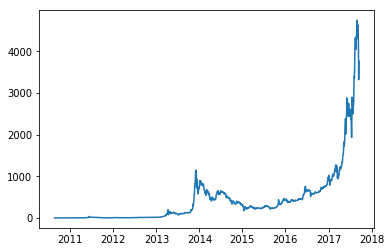

In [12]:
plt.plot(bitcoin_dataset.index, bitcoin_dataset['btc_market_price'])
plt.show()

In [13]:
bitcoin_dataset.corr(method='pearson', min_periods=1)

btc_market_price  \
btc_market_price                                            1.000000   
btc_total_bitcoins                                          0.569741   
btc_market_cap                                              0.997670   
btc_trade_volume                                            0.711037   
btc_blocks_size                                             0.787023   
btc_avg_block_size                                          0.659691   
btc_n_orphaned_blocks                                       0.008175   
btc_n_transactions_per_block                                0.642210   
btc_median_confirmation_time                                0.329735   
btc_hash_rate                                               0.913443   
btc_difficulty                                              0.916856   
btc_miners_revenue                                          0.948248   
btc_transaction_fees                                        0.785849   
btc_cost_per_transaction_percent                           -0.232246   
btc_cost_per_transaction                                    0.429482   
btc_n_unique_addresses                                      0.708257   
btc_n_transactions                                          0.659343   
btc_n_transactions_total                                    0.794754   
btc_n_transactions_excluding_popular                        0.660054   
btc_n_transactions_excluding_chains_longer_than...          0.691950   
btc_output_volume                                           0.116885   
btc_estimated_transaction_volume                            0.072611   
btc_estimated_transaction_volume_usd                        0.937168   

                                                    btc_total_bitcoins  \
btc_market_price                                              0.569741   
btc_total_bitcoins                                            1.000000   
btc_market_cap                                                0.554487   
btc_trade_volume                                              0.434812   
btc_blocks_size                                               0.811286   
btc_avg_block_size                                            0.868671   
btc_n_orphaned_blocks                                         0.310280   
btc_n_transactions_per_block                                  0.847918   
btc_median_confirmation_time                                  0.570562   
btc_hash_rate                                                 0.585837   
btc_difficulty                                                0.595188   
btc_miners_revenue                                            0.603624   
btc_transaction_fees                                          0.497226   
btc_cost_per_transaction_percent                             -0.619461   
btc_cost_per_transaction                                      0.229959   
btc_n_unique_addresses                                        0.863242   
btc_n_transactions                                            0.853590   
btc_n_transactions_total                                      0.816190   
btc_n_transactions_excluding_popular                          0.835455   
btc_n_transactions_excluding_chains_longer_than...            0.815947   
btc_output_volume                                             0.225939   
btc_estimated_transaction_volume                              0.160028   
btc_estimated_transaction_volume_usd                          0.539678   

                                                    btc_market_cap  \
btc_market_price                                          0.997670   
btc_total_bitcoins                                        0.554487   
btc_market_cap                                            1.000000   
btc_trade_volume                                          0.702145   
btc_blocks_size                                           0.795569   
btc_avg_block_size                                        0.663922   
btc_n_orphaned_blocks                                   

In [14]:
bitcoin_dataset_short=bitcoin_dataset.copy() #droping time series and a column with empty values to ensure PCA-compatability
bitcoin_dataset_short.drop(['btc_n_orphaned_blocks', "btc_cost_per_transaction_percent",
                                                      "btc_output_volume", "btc_estimated_transaction_volume", "btc_trade_volume"], axis= 1, inplace=True)

In [15]:
bitcoin_dataset_short.dtypes

btc_market_price                                       float64
btc_total_bitcoins                                     float64
btc_market_cap                                         float64
btc_blocks_size                                        float64
btc_avg_block_size                                     float64
btc_n_transactions_per_block                           float64
btc_median_confirmation_time                           float64
btc_hash_rate                                          float64
btc_difficulty                                         float64
btc_miners_revenue                                     float64
btc_transaction_fees                                   float64
btc_cost_per_transaction                               float64
btc_n_unique_addresses                                 float64
btc_n_transactions                                     float64
btc_n_transactions_total                               float64
btc_n_transactions_excluding_popular                   

In [9]:
#bitcoin_dataset_short=bitcoin_dataset.copy() #droping time series and a column with empty values to ensure PCA-compatability
#bitcoin_dataset_short.drop(["btc_trade_volume"],axis=1,inplace=True)

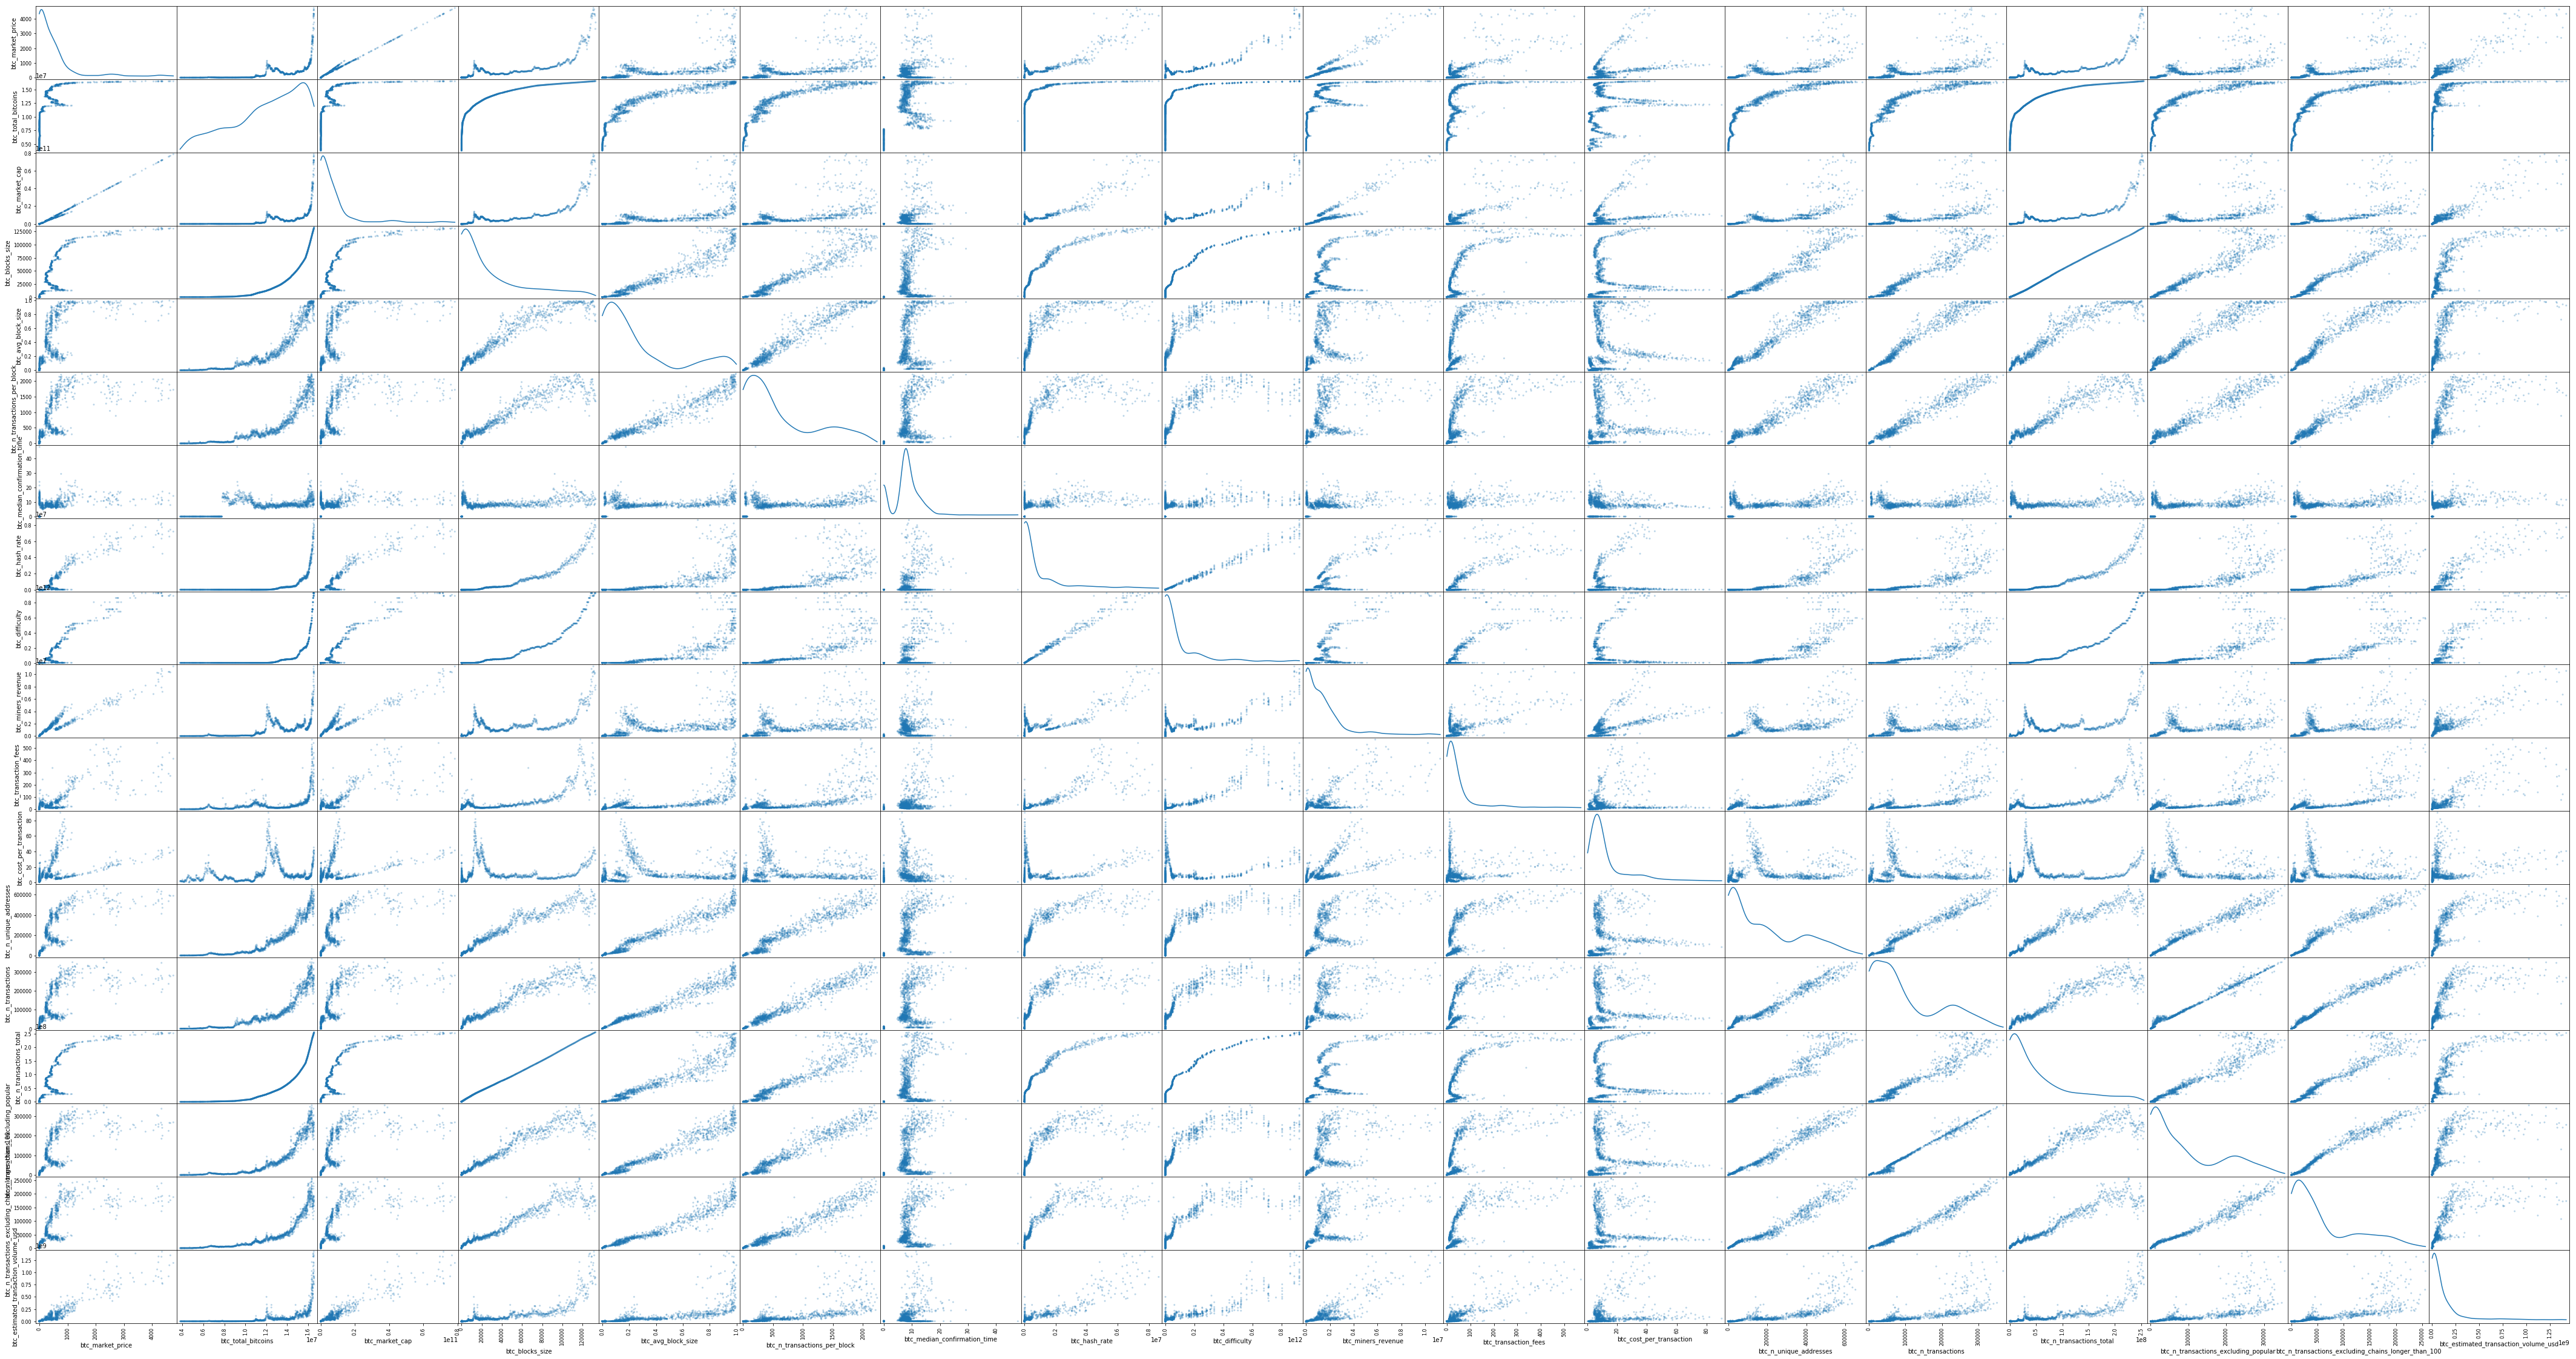

<Figure size 432x288 with 0 Axes>

In [10]:
pd.plotting.scatter_matrix(bitcoin_dataset_short, alpha = 0.3, figsize = (75,40), diagonal = 'kde')
plt.show()
plt.savefig('/media/artemk/Data/Udacity/ML engineer/6/graph1.png', dpi=300, bbox_inches='tight')

In [16]:
display(bitcoin_dataset_short.head(1))

btc_market_price  btc_total_bitcoins  btc_market_cap  \
Date                                                               
2010-08-20            0.0667           3766250.0      251208.875   

            btc_blocks_size  btc_avg_block_size  btc_n_transactions_per_block  \
Date                                                                            
2010-08-20              1.0            0.000649                           1.0   

            btc_median_confirmation_time  btc_hash_rate  btc_difficulty  \
Date                                                                      
2010-08-20                           0.0       0.004249      511.773534   

            btc_miners_revenue  btc_transaction_fees  \
Date                                                   
2010-08-20             556.945                   0.0   

            btc_cost_per_transaction  btc_n_unique_addresses  \
Date                                                           
2010-08-20                  1.399359                   433.0   

            btc_n_transactions  btc_n_transactions_total  \
Date                                                       
2010-08-20               398.0                  105951.0   

            btc_n_transactions_excluding_popular  \
Date                                               
2010-08-20                                 398.0   

            btc_n_transactions_excluding_chains_longer_than_100  \
Date                                                              
2010-08-20                                              398.0     

            btc_estimated_transaction_volume_usd  
Date                                              
2010-08-20                                1410.0

In [12]:
#from mySSA import mySSA

In [13]:
#DTW for comparison of different modules

#### Differencing: bitcoin

In [17]:
#a function to calculate discriptive statistics and test stationarity for each feature of the timeseries
from statsmodels.tsa.stattools import adfuller #adapted from [29]
def test_stationarity(timeseries):
    
    #Determing timeseries statistics
    rolmean = timeseries.rolling(window=12,center=False).mean() #rolling mean
    rolstd = timeseries.rolling(window=12,center=False).std() #rolling standard diviation

    #Plot timeseries statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
     
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

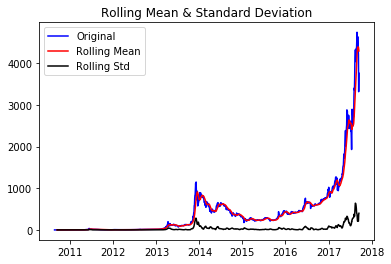

Results of Dickey-Fuller Test:
Test Statistic                    4.662674
p-value                           1.000000
#Lags Used                       23.000000
Number of Observations Used    1269.000000
Critical Value (1%)              -3.435514
Critical Value (5%)              -2.863820
Critical Value (10%)             -2.567984
dtype: float64


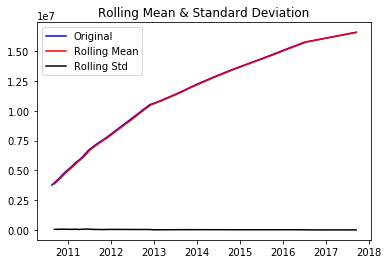

Results of Dickey-Fuller Test:
Test Statistic                   -4.020629
p-value                           0.001306
#Lags Used                       15.000000
Number of Observations Used    1277.000000
Critical Value (1%)              -3.435481
Critical Value (5%)              -2.863806
Critical Value (10%)             -2.567976
dtype: float64


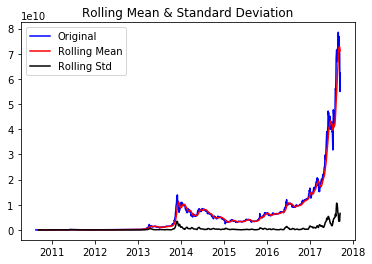

Results of Dickey-Fuller Test:
Test Statistic                    6.178978
p-value                           1.000000
#Lags Used                       23.000000
Number of Observations Used    1269.000000
Critical Value (1%)              -3.435514
Critical Value (5%)              -2.863820
Critical Value (10%)             -2.567984
dtype: float64


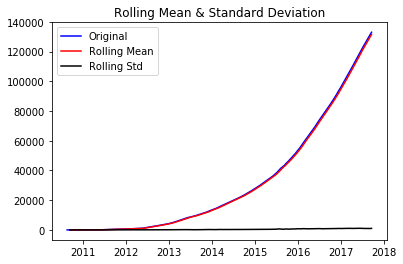

Results of Dickey-Fuller Test:
Test Statistic                   -0.144587
p-value                           0.944812
#Lags Used                       22.000000
Number of Observations Used    1270.000000
Critical Value (1%)              -3.435510
Critical Value (5%)              -2.863818
Critical Value (10%)             -2.567983
dtype: float64


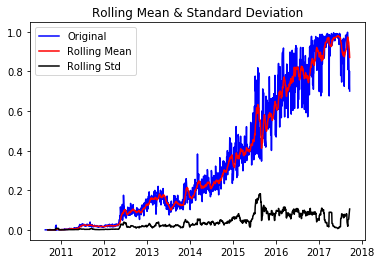

Results of Dickey-Fuller Test:
Test Statistic                    0.315001
p-value                           0.978022
#Lags Used                       21.000000
Number of Observations Used    1271.000000
Critical Value (1%)              -3.435505
Critical Value (5%)              -2.863817
Critical Value (10%)             -2.567982
dtype: float64


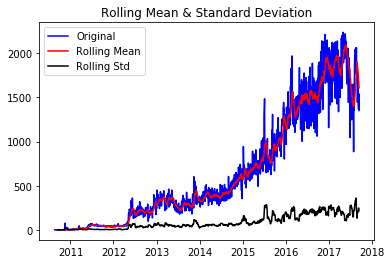

Results of Dickey-Fuller Test:
Test Statistic                   -0.193711
p-value                           0.939267
#Lags Used                       20.000000
Number of Observations Used    1272.000000
Critical Value (1%)              -3.435501
Critical Value (5%)              -2.863815
Critical Value (10%)             -2.567981
dtype: float64


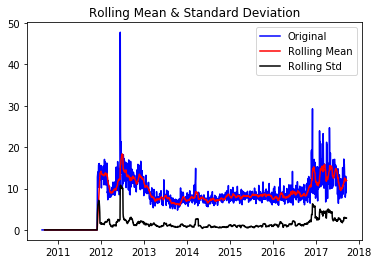

Results of Dickey-Fuller Test:
Test Statistic                   -2.521074
p-value                           0.110431
#Lags Used                       11.000000
Number of Observations Used    1281.000000
Critical Value (1%)              -3.435465
Critical Value (5%)              -2.863799
Critical Value (10%)             -2.567973
dtype: float64


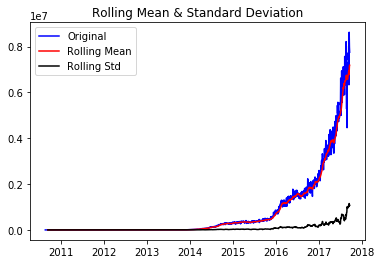

Results of Dickey-Fuller Test:
Test Statistic                   10.638583
p-value                           1.000000
#Lags Used                       22.000000
Number of Observations Used    1270.000000
Critical Value (1%)              -3.435510
Critical Value (5%)              -2.863818
Critical Value (10%)             -2.567983
dtype: float64


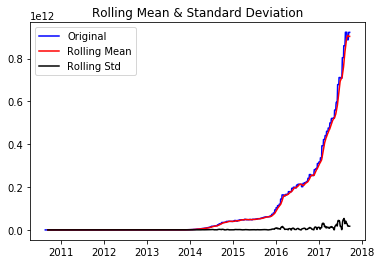

Results of Dickey-Fuller Test:
Test Statistic                    7.291499
p-value                           1.000000
#Lags Used                       23.000000
Number of Observations Used    1269.000000
Critical Value (1%)              -3.435514
Critical Value (5%)              -2.863820
Critical Value (10%)             -2.567984
dtype: float64


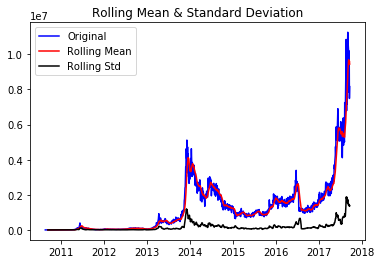

Results of Dickey-Fuller Test:
Test Statistic                    1.201419
p-value                           0.995996
#Lags Used                       23.000000
Number of Observations Used    1269.000000
Critical Value (1%)              -3.435514
Critical Value (5%)              -2.863820
Critical Value (10%)             -2.567984
dtype: float64


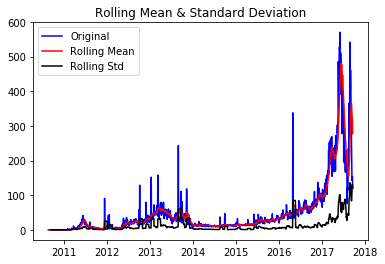

Results of Dickey-Fuller Test:
Test Statistic                   -1.561381
p-value                           0.502958
#Lags Used                       23.000000
Number of Observations Used    1269.000000
Critical Value (1%)              -3.435514
Critical Value (5%)              -2.863820
Critical Value (10%)             -2.567984
dtype: float64


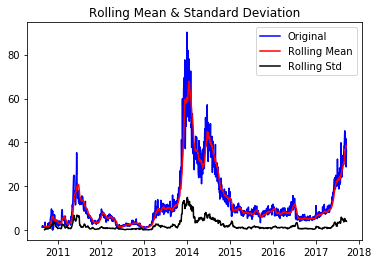

Results of Dickey-Fuller Test:
Test Statistic                   -2.890218
p-value                           0.046497
#Lags Used                       21.000000
Number of Observations Used    1271.000000
Critical Value (1%)              -3.435505
Critical Value (5%)              -2.863817
Critical Value (10%)             -2.567982
dtype: float64


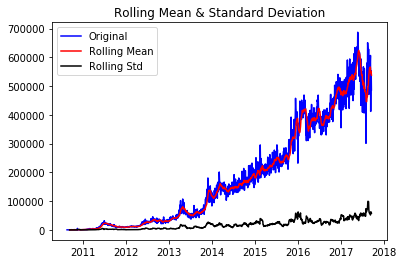

Results of Dickey-Fuller Test:
Test Statistic                    0.613782
p-value                           0.987950
#Lags Used                       23.000000
Number of Observations Used    1269.000000
Critical Value (1%)              -3.435514
Critical Value (5%)              -2.863820
Critical Value (10%)             -2.567984
dtype: float64


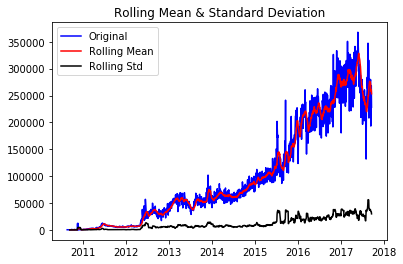

Results of Dickey-Fuller Test:
Test Statistic                    0.119092
p-value                           0.967341
#Lags Used                       20.000000
Number of Observations Used    1272.000000
Critical Value (1%)              -3.435501
Critical Value (5%)              -2.863815
Critical Value (10%)             -2.567981
dtype: float64


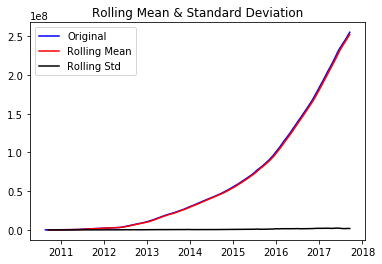

Results of Dickey-Fuller Test:
Test Statistic                    0.792599
p-value                           0.991516
#Lags Used                       23.000000
Number of Observations Used    1269.000000
Critical Value (1%)              -3.435514
Critical Value (5%)              -2.863820
Critical Value (10%)             -2.567984
dtype: float64


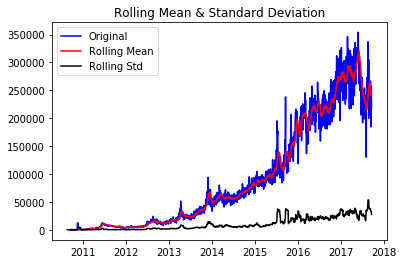

Results of Dickey-Fuller Test:
Test Statistic                    0.200773
p-value                           0.972305
#Lags Used                       23.000000
Number of Observations Used    1269.000000
Critical Value (1%)              -3.435514
Critical Value (5%)              -2.863820
Critical Value (10%)             -2.567984
dtype: float64


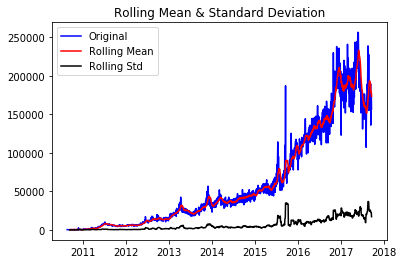

Results of Dickey-Fuller Test:
Test Statistic                    0.077034
p-value                           0.964458
#Lags Used                       23.000000
Number of Observations Used    1269.000000
Critical Value (1%)              -3.435514
Critical Value (5%)              -2.863820
Critical Value (10%)             -2.567984
dtype: float64


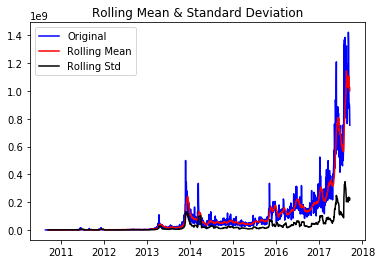

Results of Dickey-Fuller Test:
Test Statistic                    2.238637
p-value                           0.998913
#Lags Used                       22.000000
Number of Observations Used    1270.000000
Critical Value (1%)              -3.435510
Critical Value (5%)              -2.863818
Critical Value (10%)             -2.567983
dtype: float64


btc_market_price                                       None
btc_total_bitcoins                                     None
btc_market_cap                                         None
btc_blocks_size                                        None
btc_avg_block_size                                     None
btc_n_transactions_per_block                           None
btc_median_confirmation_time                           None
btc_hash_rate                                          None
btc_difficulty                                         None
btc_miners_revenue                                     None
btc_transaction_fees                                   None
btc_cost_per_transaction                               None
btc_n_unique_addresses                                 None
btc_n_transactions                                     None
btc_n_transactions_total                               None
btc_n_transactions_excluding_popular                   None
btc_n_transactions_excluding_chains_long

In [18]:
bitcoin_dataset_short.apply(test_stationarity, axis=0) #applying the stationarity test for each feature

In [19]:
bitcoin_dataset_short_log = bitcoin_dataset_short.apply(np.log, axis=0).replace(to_replace=[-np.inf], value=0)
#we log-transform replace -inf btc_n_transactions_per_block and btc_transaction_fees

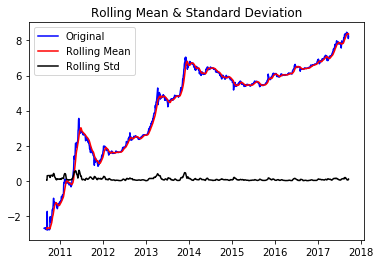

Results of Dickey-Fuller Test:
Test Statistic                   -2.619747
p-value                           0.088984
#Lags Used                       16.000000
Number of Observations Used    1276.000000
Critical Value (1%)              -3.435485
Critical Value (5%)              -2.863808
Critical Value (10%)             -2.567977
dtype: float64


In [20]:
test_stationarity(bitcoin_dataset_short_log["btc_market_price"])
#we test the stationarity once again to see the results of the log transformation

In [21]:
bitcoin_dataset_short_log_diff = bitcoin_dataset_short_log.diff(periods=2, axis=0)
#applying 2nd order differencing for the dataset

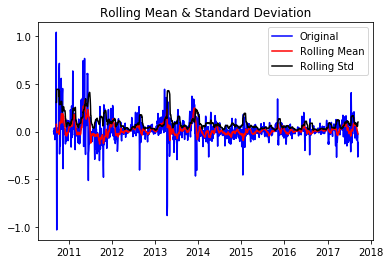

Results of Dickey-Fuller Test:
Test Statistic                -6.158606e+00
p-value                        7.265703e-08
#Lags Used                     2.200000e+01
Number of Observations Used    1.268000e+03
Critical Value (1%)           -3.435518e+00
Critical Value (5%)           -2.863822e+00
Critical Value (10%)          -2.567985e+00
dtype: float64


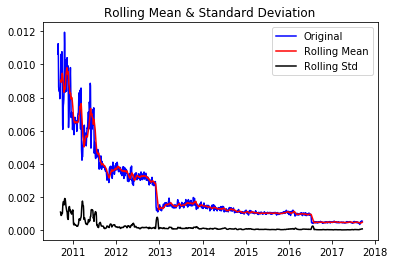

Results of Dickey-Fuller Test:
Test Statistic                   -3.045622
p-value                           0.030848
#Lags Used                       22.000000
Number of Observations Used    1268.000000
Critical Value (1%)              -3.435518
Critical Value (5%)              -2.863822
Critical Value (10%)             -2.567985
dtype: float64


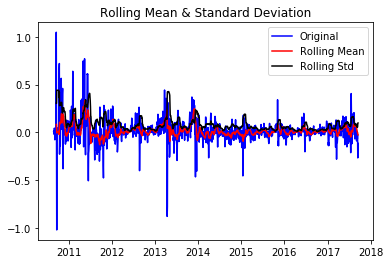

Results of Dickey-Fuller Test:
Test Statistic                -6.069483e+00
p-value                        1.160110e-07
#Lags Used                     2.200000e+01
Number of Observations Used    1.268000e+03
Critical Value (1%)           -3.435518e+00
Critical Value (5%)           -2.863822e+00
Critical Value (10%)          -2.567985e+00
dtype: float64


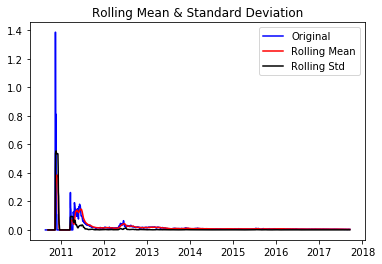

Results of Dickey-Fuller Test:
Test Statistic                -5.754495e+00
p-value                        5.862456e-07
#Lags Used                     2.200000e+01
Number of Observations Used    1.268000e+03
Critical Value (1%)           -3.435518e+00
Critical Value (5%)           -2.863822e+00
Critical Value (10%)          -2.567985e+00
dtype: float64


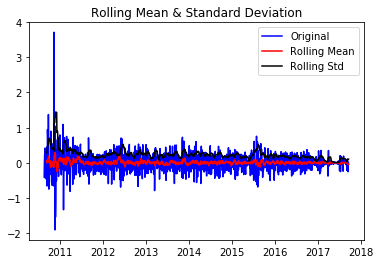

Results of Dickey-Fuller Test:
Test Statistic                -8.075747e+00
p-value                        1.507205e-12
#Lags Used                     2.300000e+01
Number of Observations Used    1.267000e+03
Critical Value (1%)           -3.435522e+00
Critical Value (5%)           -2.863824e+00
Critical Value (10%)          -2.567986e+00
dtype: float64


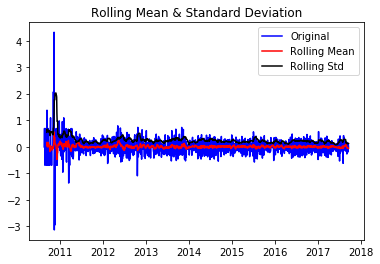

Results of Dickey-Fuller Test:
Test Statistic                -8.987310e+00
p-value                        7.043937e-15
#Lags Used                     2.300000e+01
Number of Observations Used    1.267000e+03
Critical Value (1%)           -3.435522e+00
Critical Value (5%)           -2.863824e+00
Critical Value (10%)          -2.567986e+00
dtype: float64


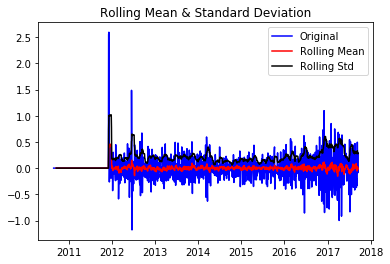

Results of Dickey-Fuller Test:
Test Statistic                -9.170306e+00
p-value                        2.398329e-15
#Lags Used                     1.700000e+01
Number of Observations Used    1.273000e+03
Critical Value (1%)           -3.435497e+00
Critical Value (5%)           -2.863813e+00
Critical Value (10%)          -2.567980e+00
dtype: float64


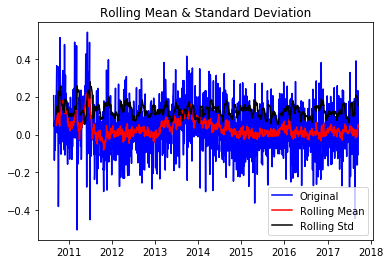

Results of Dickey-Fuller Test:
Test Statistic                   -3.794297
p-value                           0.002966
#Lags Used                       22.000000
Number of Observations Used    1268.000000
Critical Value (1%)              -3.435518
Critical Value (5%)              -2.863822
Critical Value (10%)             -2.567985
dtype: float64


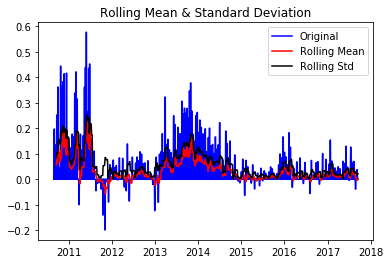

Results of Dickey-Fuller Test:
Test Statistic                   -4.084829
p-value                           0.001026
#Lags Used                       21.000000
Number of Observations Used    1269.000000
Critical Value (1%)              -3.435514
Critical Value (5%)              -2.863820
Critical Value (10%)             -2.567984
dtype: float64


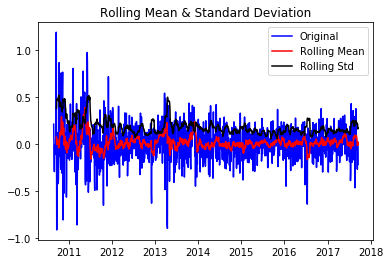

Results of Dickey-Fuller Test:
Test Statistic                -6.517398e+00
p-value                        1.062880e-08
#Lags Used                     2.300000e+01
Number of Observations Used    1.267000e+03
Critical Value (1%)           -3.435522e+00
Critical Value (5%)           -2.863824e+00
Critical Value (10%)          -2.567986e+00
dtype: float64


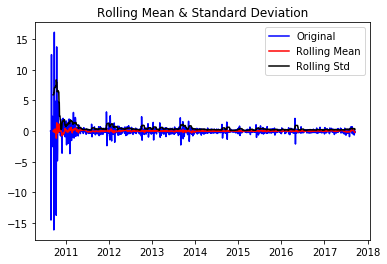

Results of Dickey-Fuller Test:
Test Statistic                -7.784349e+00
p-value                        8.255797e-12
#Lags Used                     2.300000e+01
Number of Observations Used    1.267000e+03
Critical Value (1%)           -3.435522e+00
Critical Value (5%)           -2.863824e+00
Critical Value (10%)          -2.567986e+00
dtype: float64


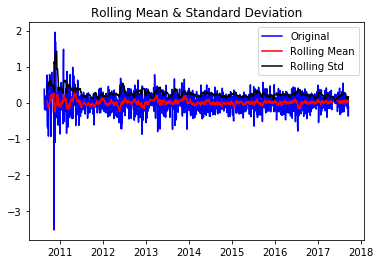

Results of Dickey-Fuller Test:
Test Statistic                -6.979242e+00
p-value                        8.274028e-10
#Lags Used                     2.300000e+01
Number of Observations Used    1.267000e+03
Critical Value (1%)           -3.435522e+00
Critical Value (5%)           -2.863824e+00
Critical Value (10%)          -2.567986e+00
dtype: float64


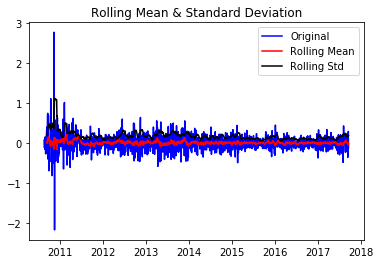

Results of Dickey-Fuller Test:
Test Statistic                -6.258036e+00
p-value                        4.290793e-08
#Lags Used                     2.100000e+01
Number of Observations Used    1.269000e+03
Critical Value (1%)           -3.435514e+00
Critical Value (5%)           -2.863820e+00
Critical Value (10%)          -2.567984e+00
dtype: float64


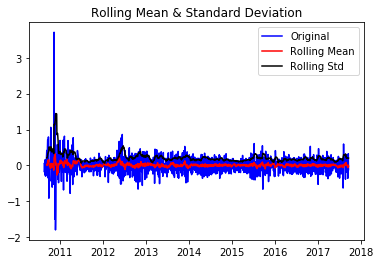

Results of Dickey-Fuller Test:
Test Statistic                -8.957829e+00
p-value                        8.380360e-15
#Lags Used                     2.100000e+01
Number of Observations Used    1.269000e+03
Critical Value (1%)           -3.435514e+00
Critical Value (5%)           -2.863820e+00
Critical Value (10%)          -2.567984e+00
dtype: float64


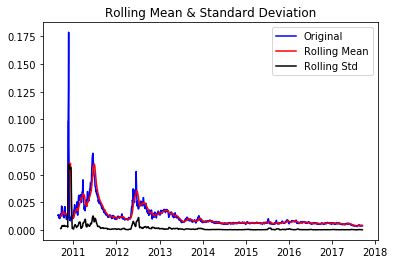

Results of Dickey-Fuller Test:
Test Statistic                   -2.947509
p-value                           0.040096
#Lags Used                       22.000000
Number of Observations Used    1268.000000
Critical Value (1%)              -3.435518
Critical Value (5%)              -2.863822
Critical Value (10%)             -2.567985
dtype: float64


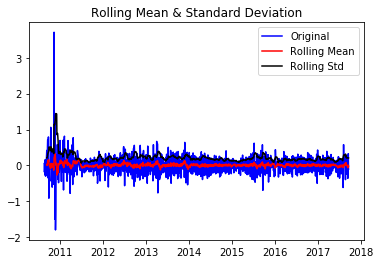

Results of Dickey-Fuller Test:
Test Statistic                -9.662387e+00
p-value                        1.342741e-16
#Lags Used                     2.100000e+01
Number of Observations Used    1.269000e+03
Critical Value (1%)           -3.435514e+00
Critical Value (5%)           -2.863820e+00
Critical Value (10%)          -2.567984e+00
dtype: float64


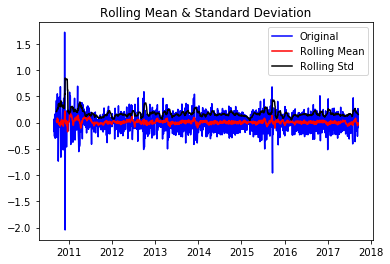

Results of Dickey-Fuller Test:
Test Statistic                -7.941473e+00
p-value                        3.305061e-12
#Lags Used                     2.200000e+01
Number of Observations Used    1.268000e+03
Critical Value (1%)           -3.435518e+00
Critical Value (5%)           -2.863822e+00
Critical Value (10%)          -2.567985e+00
dtype: float64


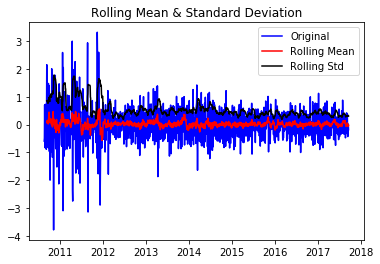

Results of Dickey-Fuller Test:
Test Statistic                -8.665168e+00
p-value                        4.705835e-14
#Lags Used                     2.100000e+01
Number of Observations Used    1.269000e+03
Critical Value (1%)           -3.435514e+00
Critical Value (5%)           -2.863820e+00
Critical Value (10%)          -2.567984e+00
dtype: float64


btc_market_price                                       None
btc_total_bitcoins                                     None
btc_market_cap                                         None
btc_blocks_size                                        None
btc_avg_block_size                                     None
btc_n_transactions_per_block                           None
btc_median_confirmation_time                           None
btc_hash_rate                                          None
btc_difficulty                                         None
btc_miners_revenue                                     None
btc_transaction_fees                                   None
btc_cost_per_transaction                               None
btc_n_unique_addresses                                 None
btc_n_transactions                                     None
btc_n_transactions_total                               None
btc_n_transactions_excluding_popular                   None
btc_n_transactions_excluding_chains_long

In [22]:
bitcoin_dataset_short_log_diff.dropna(inplace=True)
bitcoin_dataset_short_log_diff.apply(test_stationarity, axis=0)
#we test the stationarity once again to see the results of the differencing

#### PCA and unsupervised learning: bitcoin

In [23]:
def pca_results(input_data, pca): #adapted from [37]
    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = input_data.keys())
    components.index = dimensions
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions
    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

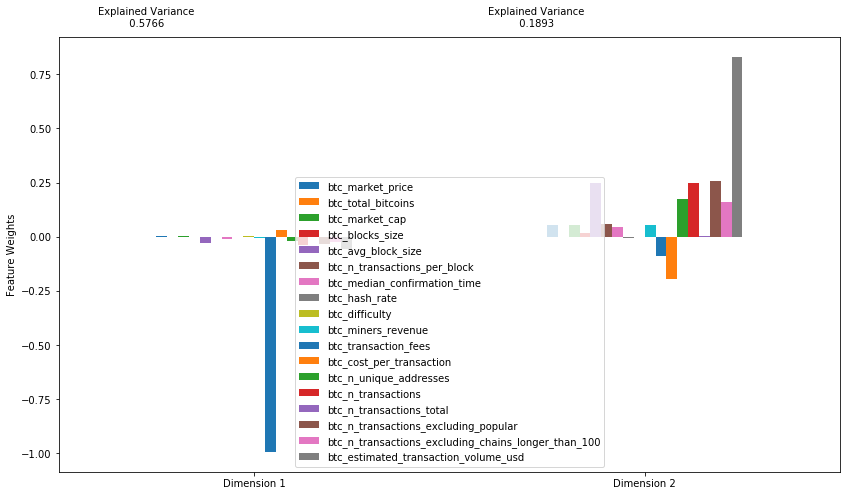

In [24]:
pca = PCA(n_components=2, random_state=0)
pca.fit(bitcoin_dataset_short_log_diff)

# Generate PCA results plot
bitcoin_pca_results = pca_results(bitcoin_dataset_short_log_diff, pca)

In [25]:
print (bitcoin_pca_results)

             Explained Variance  btc_market_price  btc_total_bitcoins  \
Dimension 1              0.5766            0.0014              0.0000   
Dimension 2              0.1893            0.0534              0.0002   

             btc_market_cap  btc_blocks_size  btc_avg_block_size  \
Dimension 1          0.0014          -0.0001             -0.0305   
Dimension 2          0.0540           0.0154              0.2496   

             btc_n_transactions_per_block  btc_median_confirmation_time  \
Dimension 1                       -0.0036                       -0.0097   
Dimension 2                        0.0584                        0.0440   

             btc_hash_rate  btc_difficulty  btc_miners_revenue  \
Dimension 1        -0.0028          0.0042             -0.0075   
Dimension 2        -0.0057         -0.0013              0.0519   

             btc_transaction_fees  btc_cost_per_transaction  \
Dimension 1               -0.9954                    0.0301   
Dimension 2             

In [26]:
bitcoin_dataset_pca = pca.transform(bitcoin_dataset_short_log_diff)

In [27]:
for possible_clusters_number in range(2,20): #calculates silhouette score for different number of clusters
    clusterer = mixture.GaussianMixture(n_components=possible_clusters_number, random_state=0).fit(bitcoin_dataset_pca)  
    preds = clusterer.predict(bitcoin_dataset_pca) 
    centers = clusterer.means_
    score = metrics.silhouette_score(bitcoin_dataset_pca, preds)
    print ("For n_clusters =", possible_clusters_number,"the average silhouette_score is :", score)

For n_clusters = 2 the average silhouette_score is : 0.5967139197067871
For n_clusters = 3 the average silhouette_score is : 0.5544581672738995
For n_clusters = 4 the average silhouette_score is : 0.225082884596909
For n_clusters = 5 the average silhouette_score is : 0.44765234602754067
For n_clusters = 6 the average silhouette_score is : 0.07621946485655415
For n_clusters = 7 the average silhouette_score is : 0.27365108225180385
For n_clusters = 8 the average silhouette_score is : 0.27588860089147416
For n_clusters = 9 the average silhouette_score is : 0.3291238399634646
For n_clusters = 10 the average silhouette_score is : 0.3291189558414565
For n_clusters = 11 the average silhouette_score is : 0.2883545768061778
For n_clusters = 12 the average silhouette_score is : 0.31012803176535925
For n_clusters = 13 the average silhouette_score is : 0.32278841273387443
For n_clusters = 14 the average silhouette_score is : 0.3182253864503014
For n_clusters = 15 the average silhouette_score is : 

In [28]:
for possible_clusters_number in range(2,20):
    clusterer = cluster.KMeans(n_clusters=possible_clusters_number, random_state=0).fit(bitcoin_dataset_pca)
    preds = clusterer.predict(bitcoin_dataset_pca)
    score = metrics.silhouette_score(bitcoin_dataset_pca, preds)
    print ("For n_clusters =", possible_clusters_number,"the average silhouette_score is :", score)

For n_clusters = 2 the average silhouette_score is : 0.9299307903969198
For n_clusters = 3 the average silhouette_score is : 0.9279170223814348
For n_clusters = 4 the average silhouette_score is : 0.40658113938564533
For n_clusters = 5 the average silhouette_score is : 0.42215938268401265
For n_clusters = 6 the average silhouette_score is : 0.43583714704030174
For n_clusters = 7 the average silhouette_score is : 0.3861142418528202
For n_clusters = 8 the average silhouette_score is : 0.3467739756855775
For n_clusters = 9 the average silhouette_score is : 0.331000537901443
For n_clusters = 10 the average silhouette_score is : 0.34743105114131784
For n_clusters = 11 the average silhouette_score is : 0.37704348916484504
For n_clusters = 12 the average silhouette_score is : 0.34136885670988515
For n_clusters = 13 the average silhouette_score is : 0.35533526384611225
For n_clusters = 14 the average silhouette_score is : 0.3282086558049597
For n_clusters = 15 the average silhouette_score is :

In [29]:
clusterer = mixture.GaussianMixture(n_components=2, random_state=0).fit(bitcoin_dataset_pca)
preds = clusterer.predict(bitcoin_dataset_pca)
centers = clusterer.means_
score = metrics.silhouette_score(bitcoin_dataset_pca, preds)

In [30]:
def cluster_results(reduced_data, preds, centers): #adapted from [37]


    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):
        cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    # Set plot title
    ax.set_title("Cluster Learning on PCA-Reduced Data");

In [31]:
bitcoin_usl_data = pd.DataFrame(bitcoin_dataset_pca, columns = ['Dimension 1', 'Dimension 2'])

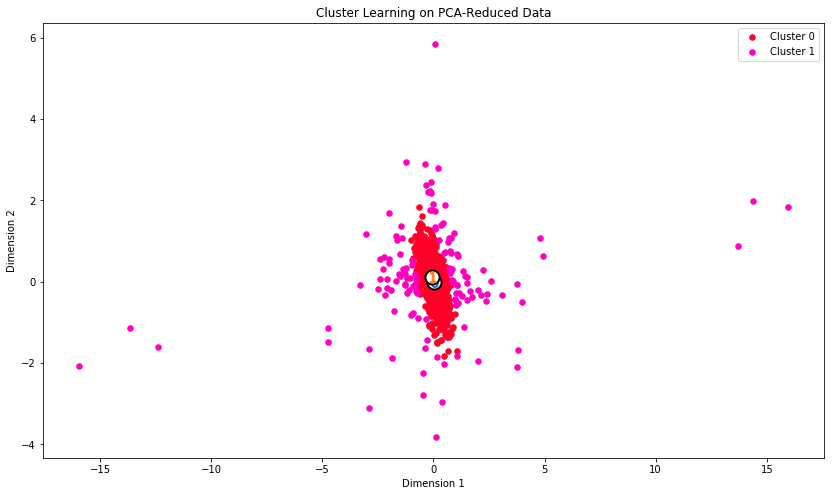

In [32]:
cluster_results(bitcoin_usl_data, preds, centers)
plt.show()

#### Benchmark model: bitcoin

In [71]:
yb = (bitcoin_dataset_short_log_diff['btc_market_price']).values
Xb = (bitcoin_dataset_short_log_diff.drop('btc_market_price', axis = 1)).values

In [72]:
Xb_train = Xb[1::2] 
yb_train = yb[1::2]
Xb_test = Xb[2::2]
yb_test = yb[2::2]

In [73]:
regressor = linear_model.LinearRegression()

In [74]:
regressor.fit(Xb_train, yb_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
yb_hat_x = regressor.predict(Xb_test)

In [76]:
mae = mean_absolute_error(yb_test, yb_hat_x)
rmse = np.sqrt(mean_squared_error(yb_test, yb_hat_x))
print("Test MAE: %.3f" % mae,"\n",'Test RMSE: %.3f' % rmse)

Test MAE: 0.001 
 Test RMSE: 0.004


### Data analysis: Etherium

In [77]:
eth_dataset_pd = pd.read_csv("/media/artemk/Data/Udacity/ML engineer/6/data/ethereum_dataset.csv", parse_dates=[0], index_col='Date')
eth_dataset_pd.replace(r'\s+', 0, regex=True)
eth_dataset_pd.drop(['UnixTimeStamp'], axis= 1, inplace=True)
eth_dataset_pd.drop(eth_dataset_pd.index[:13], inplace =True)

In [78]:
eth_dataset_pd.dtypes

eth_etherprice      float64
eth_tx                int64
eth_address           int64
eth_supply          float64
eth_marketcap       float64
eth_hashrate        float64
eth_difficulty      float64
eth_blocks            int64
eth_uncles            int64
eth_blocksize         int64
eth_blocktime       float64
eth_gasprice          int64
eth_gaslimit          int64
eth_gasused           int64
eth_ethersupply     float64
eth_ens_register      int64
dtype: object

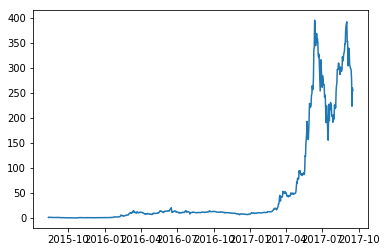

In [82]:
plt.plot(eth_dataset_pd.index, eth_dataset_pd['eth_etherprice'])
plt.show()

In [83]:
eth_dataset_pd.corr(method='pearson', min_periods=1)

eth_etherprice    eth_tx  eth_address  eth_supply  \
eth_etherprice          1.000000  0.955109     0.915579    0.687886   
eth_tx                  0.955109  1.000000     0.970866    0.751909   
eth_address             0.915579  0.970866     1.000000    0.772205   
eth_supply              0.687886  0.751909     0.772205    1.000000   
eth_marketcap           0.999934  0.956567     0.918594    0.686228   
eth_hashrate            0.934797  0.974287     0.993075    0.729635   
eth_difficulty          0.903177  0.956646     0.985974    0.666363   
eth_blocks             -0.580499 -0.549251    -0.575713   -0.010507   
eth_uncles             -0.131209 -0.123873    -0.164989   -0.046534   
eth_blocksize           0.919823  0.975646     0.963704    0.664248   
eth_blocktime           0.616344  0.610827     0.652766    0.104828   
eth_gasprice           -0.116481 -0.154908    -0.144124   -0.303355   
eth_gaslimit            0.662732  0.721299     0.705609    0.526218   
eth_gasused             0.956289  0.985071     0.950390    0.716597   
eth_ethersupply        -0.564781 -0.533944    -0.566635   -0.019660   
eth_ens_register        0.731336  0.634061     0.555579    0.507788   

                  eth_marketcap  eth_hashrate  eth_difficulty  eth_blocks  \
eth_etherprice         0.999934      0.934797        0.903177   -0.580499   
eth_tx                 0.956567      0.974287        0.956646   -0.549251   
eth_address            0.918594      0.993075        0.985974   -0.575713   
eth_supply             0.686228      0.729635        0.666363   -0.010507   
eth_marketcap          1.000000      0.937514        0.907166   -0.586549   
eth_hashrate           0.937514      1.000000        0.987484   -0.619867   
eth_difficulty         0.907166      0.987484        1.000000   -0.666572   
eth_blocks            -0.586549     -0.619867       -0.666572    1.000000   
eth_uncles            -0.133100     -0.173889       -0.180930    0.307169   
eth_blocksize          0.922936      0.965012        0.973398   -0.630796   
eth_blocktime          0.623095      0.680358        0.738760   -0.980862   
eth_gasprice          -0.114695     -0.128893       -0.108065   -0.164745   
eth_gaslimit           0.663258      0.724678        0.711023   -0.323948   
eth_gasused            0.957470      0.959666        0.938364   -0.571488   
eth_ethersupply       -0.570769     -0.609115       -0.653766    0.987356   
eth_ens_register       0.726976      0.592332        0.507812   -0.320073   

                  eth_uncles  eth_blocksize  eth_blocktime  eth_gasprice  \
eth_etherprice     -0.131209       0.919823       0.616344     -0.116481   
eth_tx             -0.123873       0.975646       0.610827     -0.154908   
eth_address        -0.164989       0.963704       0.652766     -0.144124   
eth_supply         -0.046534       0.664248       0.104828     -0.303355   
eth_marketcap      -0.133100       0.922936       0.623095     -0.114695   
eth_hashrate       -0.173889       0.965012       0.680358     -0.128893   
eth_difficulty     -0.180930       0.973398       0.738760     -0.108065   
eth_blocks          0.307169      -0.630796      -0.980862     -0.164745   
eth_uncles          1.000000      -0.114237      -0.306143     -0.036737   
eth_blocksize      -0.114237       1.000000       0.698713     -0.118641   
eth_blocktime      -0.306143       0.698713       1.000000      0.131740   
eth_gasprice       -0.036737      -0.118641       0.131740      1.000000   
eth_gaslimit       -0.300821       0.687413       0.365956     -0.196964   
eth_gasused        -0.065189       0.962670       0.619710     -0.136293   
eth_ethersupply     0.452291      -0.608976      -0.969417     -0.161624   
eth_ens_register   -0.060959       0.553147       0.288426     -0.088007   

                  eth_gaslimit  eth_gasused  eth_ethersupply  eth_ens_register  
eth_etherprice        0.662732     0.956289        -0.564781          0.731336  
eth_tx                0.721299     0.985071  

In [84]:
eth_dataset_short=eth_dataset_pd.copy() #droping time series and a column with empty values to ensure PCA-compatability
eth_dataset_short.drop(["eth_uncles","eth_gasprice"], axis= 1, inplace=True)

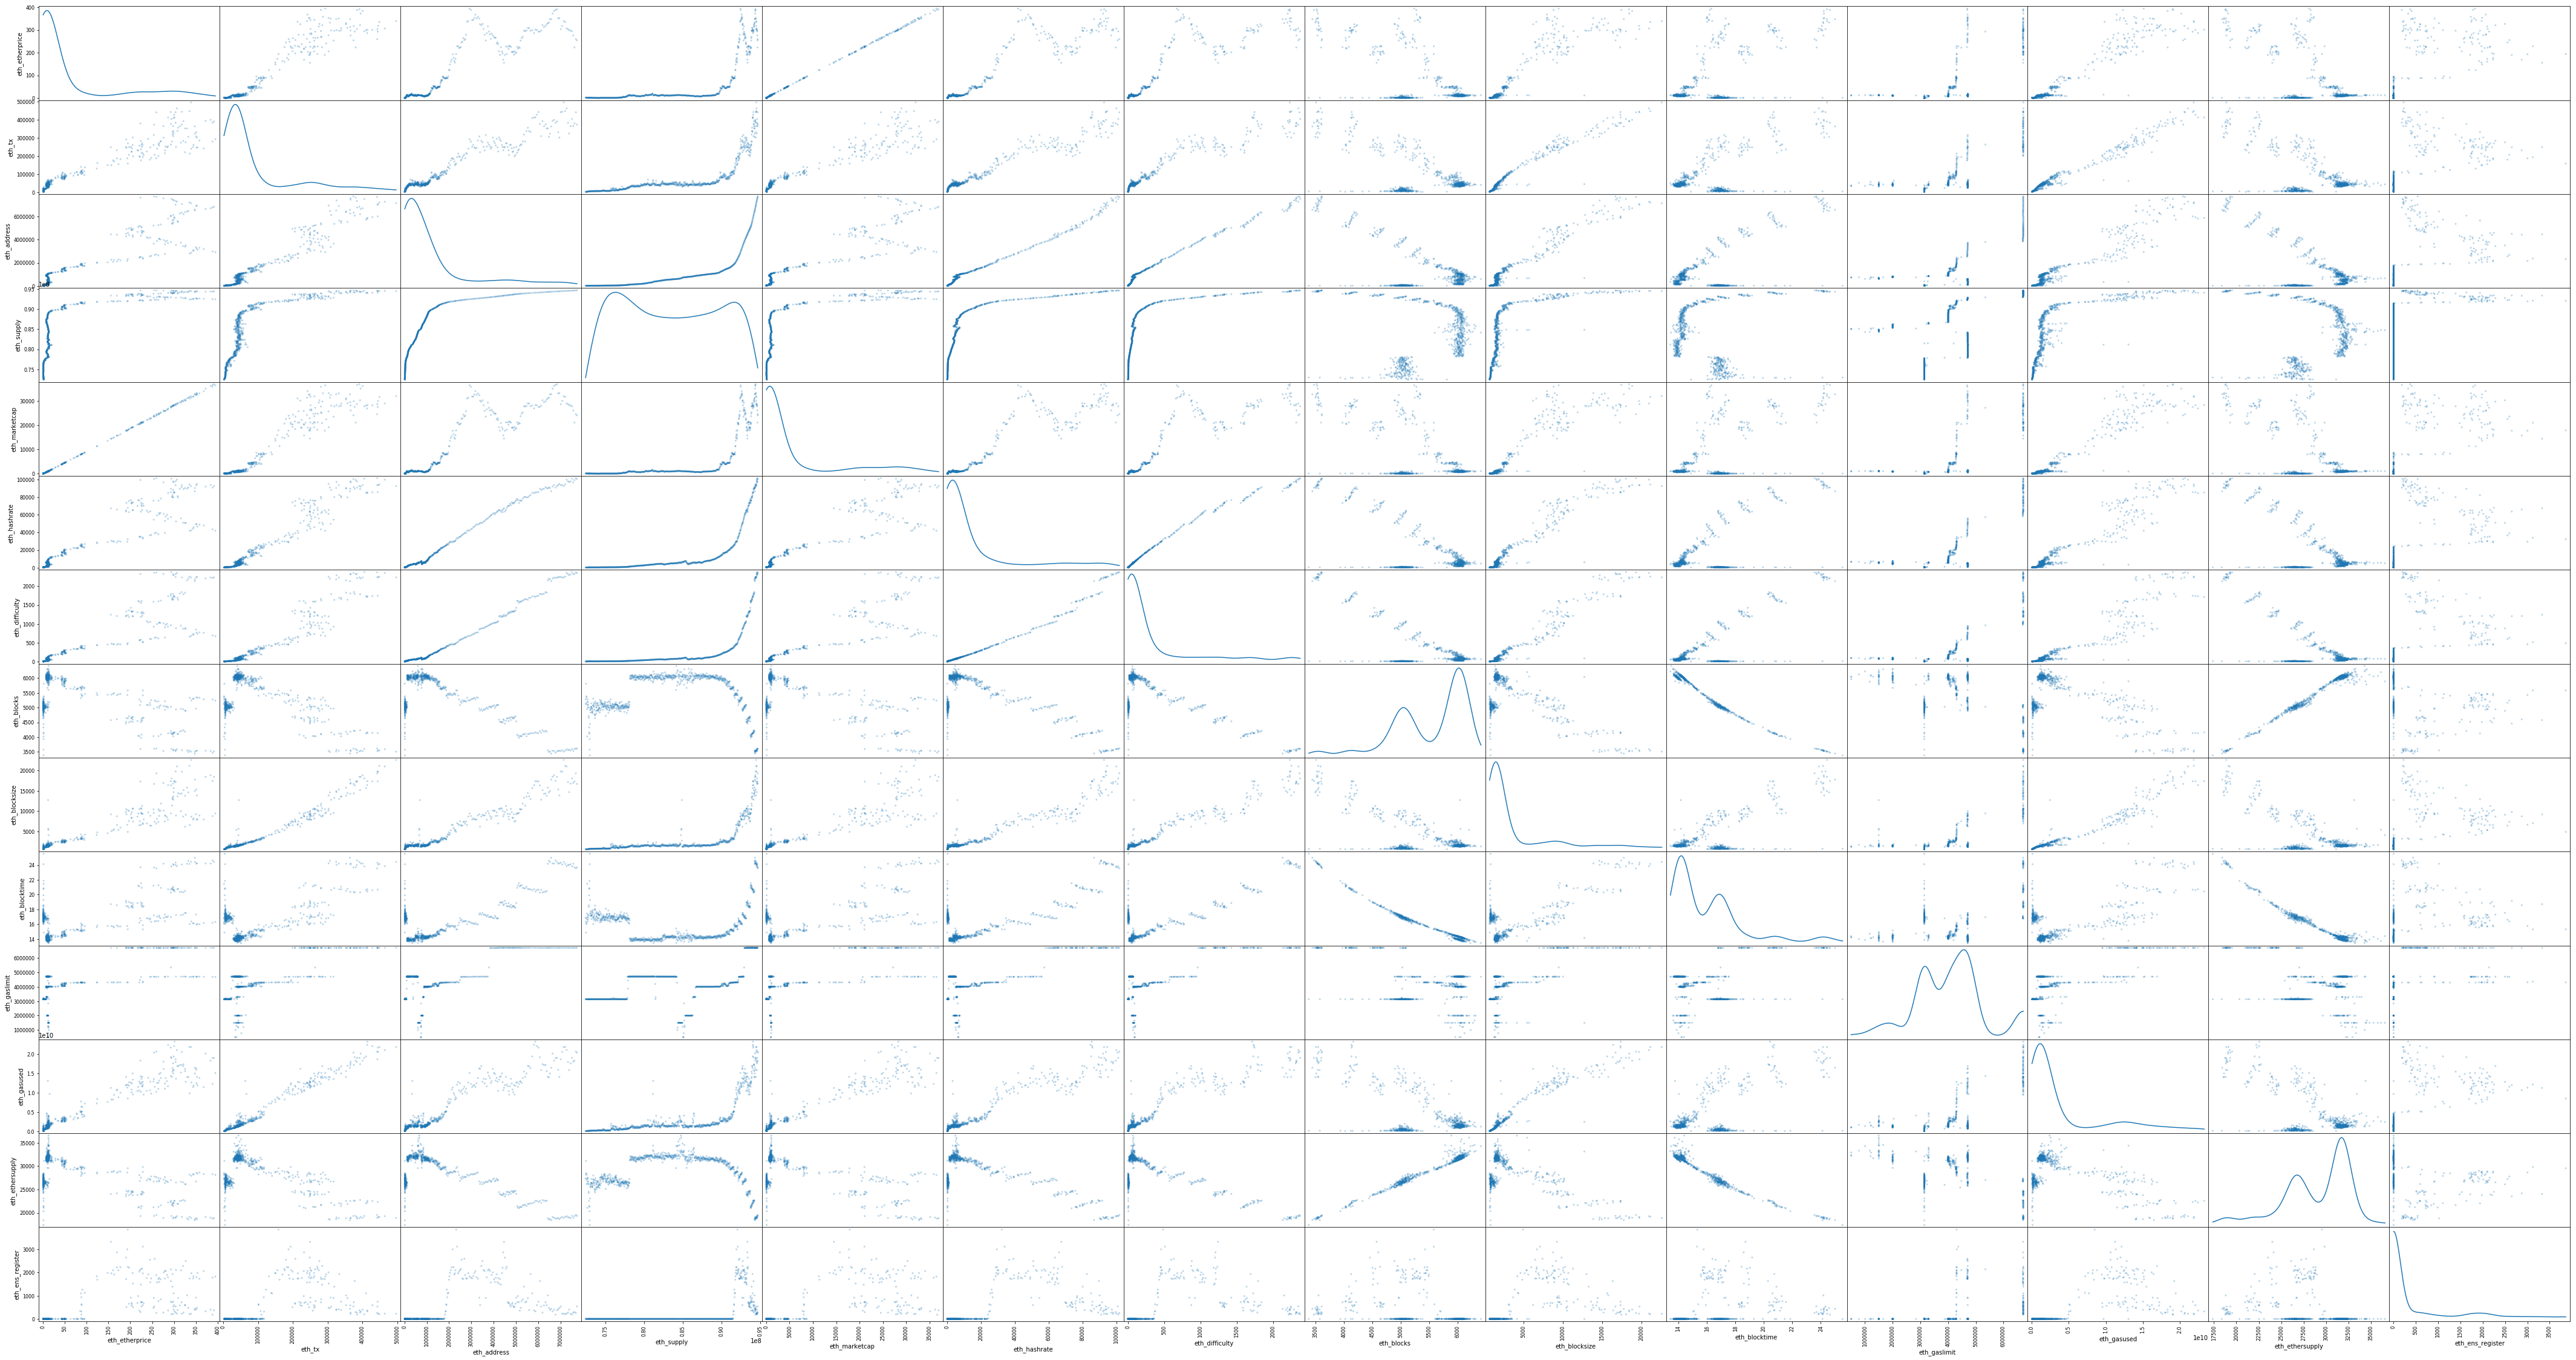

<Figure size 432x288 with 0 Axes>

In [48]:
pd.plotting.scatter_matrix(eth_dataset_short, alpha = 0.3, figsize = (75,40), diagonal = 'kde')
plt.show()
plt.savefig('/media/artemk/Data/Udacity/ML engineer/6/graph2.png', dpi=300, bbox_inches='tight')

#### Differencing: etherium

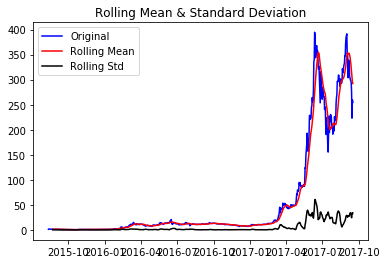

Results of Dickey-Fuller Test:
Test Statistic                  -2.356917
p-value                          0.154267
#Lags Used                      20.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


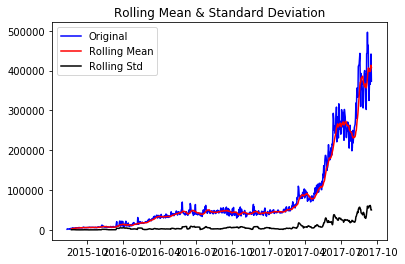

Results of Dickey-Fuller Test:
Test Statistic                   3.648298
p-value                          1.000000
#Lags Used                      20.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


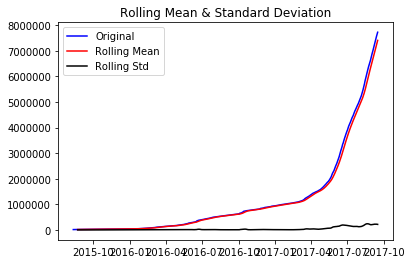

Results of Dickey-Fuller Test:
Test Statistic                   1.586027
p-value                          0.997815
#Lags Used                      20.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


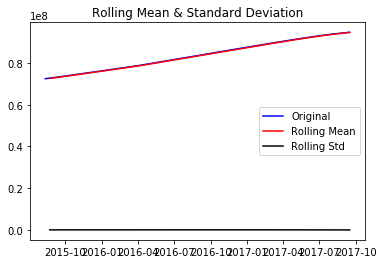

Results of Dickey-Fuller Test:
Test Statistic                  -3.621106
p-value                          0.005370
#Lags Used                      18.000000
Number of Observations Used    748.000000
Critical Value (1%)             -3.439123
Critical Value (5%)             -2.865412
Critical Value (10%)            -2.568832
dtype: float64


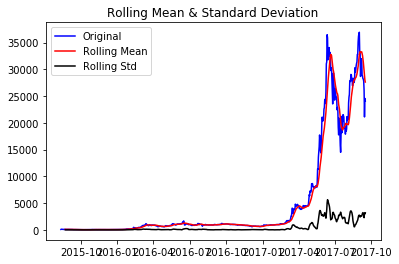

Results of Dickey-Fuller Test:
Test Statistic                  -2.340587
p-value                          0.159212
#Lags Used                      20.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


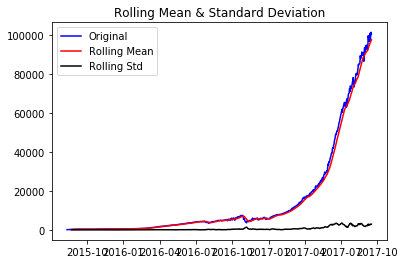

Results of Dickey-Fuller Test:
Test Statistic                   2.687325
p-value                          0.999086
#Lags Used                      20.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


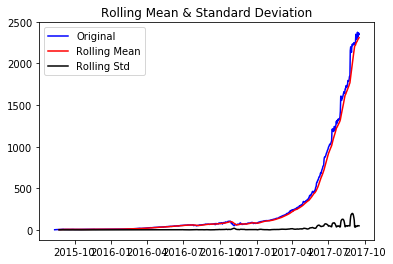

Results of Dickey-Fuller Test:
Test Statistic                   6.253545
p-value                          1.000000
#Lags Used                      19.000000
Number of Observations Used    747.000000
Critical Value (1%)             -3.439134
Critical Value (5%)             -2.865417
Critical Value (10%)            -2.568834
dtype: float64


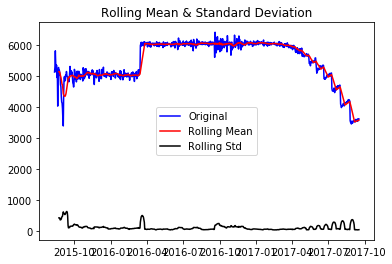

Results of Dickey-Fuller Test:
Test Statistic                   0.478428
p-value                          0.984202
#Lags Used                      17.000000
Number of Observations Used    749.000000
Critical Value (1%)             -3.439111
Critical Value (5%)             -2.865407
Critical Value (10%)            -2.568829
dtype: float64


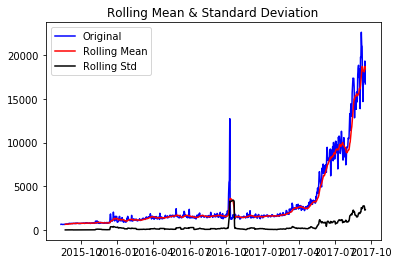

Results of Dickey-Fuller Test:
Test Statistic                   4.653374
p-value                          1.000000
#Lags Used                      20.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


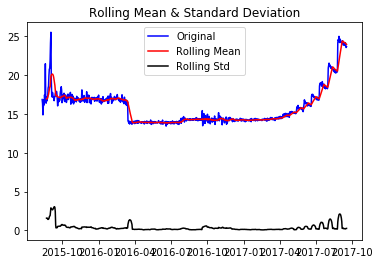

Results of Dickey-Fuller Test:
Test Statistic                   1.791680
p-value                          0.998332
#Lags Used                      20.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


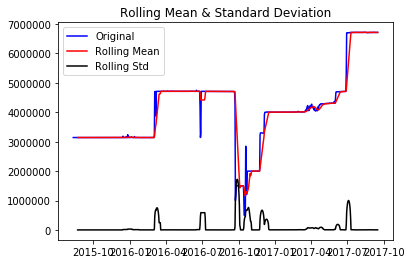

Results of Dickey-Fuller Test:
Test Statistic                  -1.200169
p-value                          0.673523
#Lags Used                       3.000000
Number of Observations Used    763.000000
Critical Value (1%)             -3.438950
Critical Value (5%)             -2.865335
Critical Value (10%)            -2.568791
dtype: float64


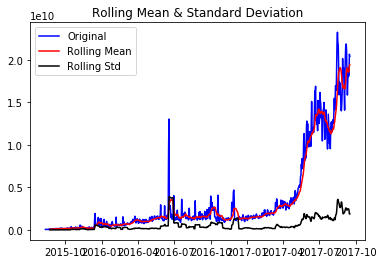

Results of Dickey-Fuller Test:
Test Statistic                   2.537636
p-value                          0.999061
#Lags Used                      19.000000
Number of Observations Used    747.000000
Critical Value (1%)             -3.439134
Critical Value (5%)             -2.865417
Critical Value (10%)            -2.568834
dtype: float64


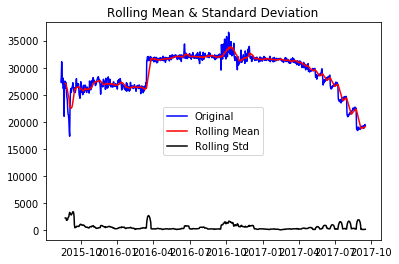

Results of Dickey-Fuller Test:
Test Statistic                   0.261915
p-value                          0.975528
#Lags Used                      20.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


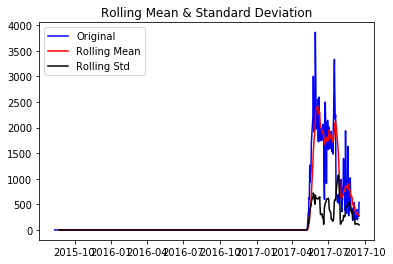

Results of Dickey-Fuller Test:
Test Statistic                  -2.277621
p-value                          0.179287
#Lags Used                      11.000000
Number of Observations Used    755.000000
Critical Value (1%)             -3.439041
Critical Value (5%)             -2.865376
Critical Value (10%)            -2.568813
dtype: float64


eth_etherprice      None
eth_tx              None
eth_address         None
eth_supply          None
eth_marketcap       None
eth_hashrate        None
eth_difficulty      None
eth_blocks          None
eth_blocksize       None
eth_blocktime       None
eth_gaslimit        None
eth_gasused         None
eth_ethersupply     None
eth_ens_register    None
dtype: object

In [85]:
eth_dataset_short.apply(test_stationarity, axis=0)

In [86]:
eth_dataset_short_log = eth_dataset_short.apply(np.log, axis=0).replace(to_replace=[-np.inf], value=0)
eth_short_log_diff = eth_dataset_short_log.diff(periods=2, axis=0)

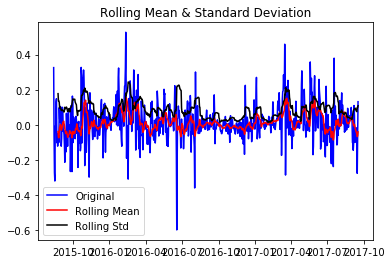

Results of Dickey-Fuller Test:
Test Statistic                  -3.898398
p-value                          0.002047
#Lags Used                      20.000000
Number of Observations Used    744.000000
Critical Value (1%)             -3.439170
Critical Value (5%)             -2.865433
Critical Value (10%)            -2.568843
dtype: float64


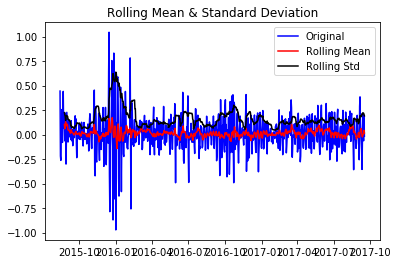

Results of Dickey-Fuller Test:
Test Statistic                -6.995634e+00
p-value                        7.546636e-10
#Lags Used                     2.000000e+01
Number of Observations Used    7.440000e+02
Critical Value (1%)           -3.439170e+00
Critical Value (5%)           -2.865433e+00
Critical Value (10%)          -2.568843e+00
dtype: float64


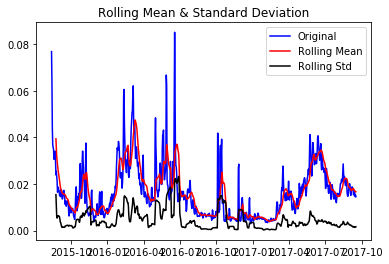

Results of Dickey-Fuller Test:
Test Statistic                  -2.749042
p-value                          0.065929
#Lags Used                      20.000000
Number of Observations Used    744.000000
Critical Value (1%)             -3.439170
Critical Value (5%)             -2.865433
Critical Value (10%)            -2.568843
dtype: float64


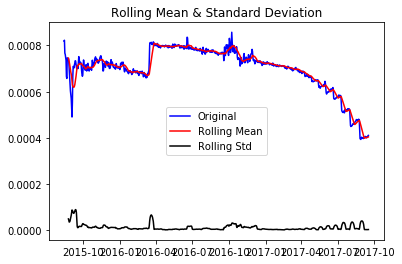

Results of Dickey-Fuller Test:
Test Statistic                   2.744984
p-value                          1.000000
#Lags Used                      20.000000
Number of Observations Used    744.000000
Critical Value (1%)             -3.439170
Critical Value (5%)             -2.865433
Critical Value (10%)            -2.568843
dtype: float64


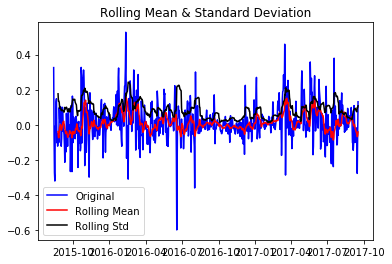

Results of Dickey-Fuller Test:
Test Statistic                  -3.898253
p-value                          0.002048
#Lags Used                      20.000000
Number of Observations Used    744.000000
Critical Value (1%)             -3.439170
Critical Value (5%)             -2.865433
Critical Value (10%)            -2.568843
dtype: float64


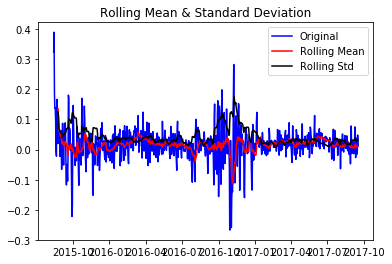

Results of Dickey-Fuller Test:
Test Statistic                  -5.373314
p-value                          0.000004
#Lags Used                      20.000000
Number of Observations Used    744.000000
Critical Value (1%)             -3.439170
Critical Value (5%)             -2.865433
Critical Value (10%)            -2.568843
dtype: float64


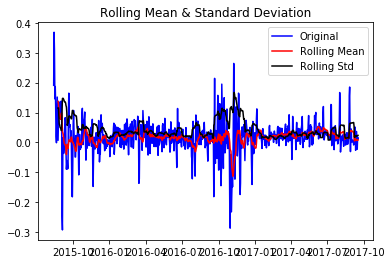

Results of Dickey-Fuller Test:
Test Statistic                -7.516293e+00
p-value                        3.895354e-11
#Lags Used                     1.700000e+01
Number of Observations Used    7.470000e+02
Critical Value (1%)           -3.439134e+00
Critical Value (5%)           -2.865417e+00
Critical Value (10%)          -2.568834e+00
dtype: float64


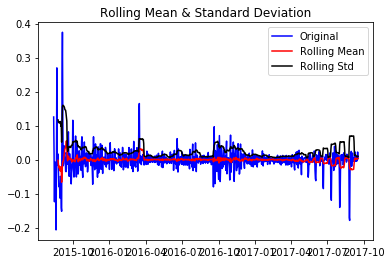

Results of Dickey-Fuller Test:
Test Statistic                -9.023989e+00
p-value                        5.675028e-15
#Lags Used                     1.500000e+01
Number of Observations Used    7.490000e+02
Critical Value (1%)           -3.439111e+00
Critical Value (5%)           -2.865407e+00
Critical Value (10%)          -2.568829e+00
dtype: float64


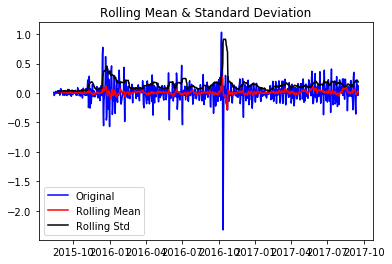

Results of Dickey-Fuller Test:
Test Statistic                -7.490730e+00
p-value                        4.512945e-11
#Lags Used                     2.000000e+01
Number of Observations Used    7.440000e+02
Critical Value (1%)           -3.439170e+00
Critical Value (5%)           -2.865433e+00
Critical Value (10%)          -2.568843e+00
dtype: float64


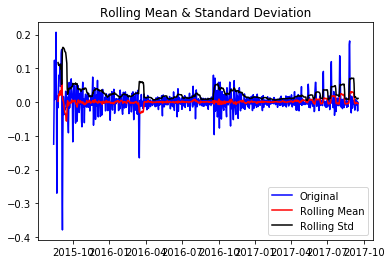

Results of Dickey-Fuller Test:
Test Statistic                -8.869266e+00
p-value                        1.412476e-14
#Lags Used                     1.500000e+01
Number of Observations Used    7.490000e+02
Critical Value (1%)           -3.439111e+00
Critical Value (5%)           -2.865407e+00
Critical Value (10%)          -2.568829e+00
dtype: float64


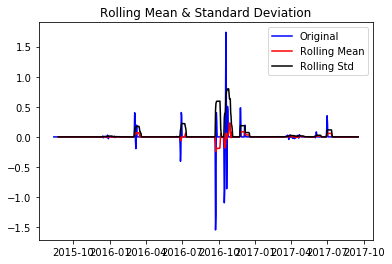

Results of Dickey-Fuller Test:
Test Statistic                  -5.082649
p-value                          0.000015
#Lags Used                      20.000000
Number of Observations Used    744.000000
Critical Value (1%)             -3.439170
Critical Value (5%)             -2.865433
Critical Value (10%)            -2.568843
dtype: float64


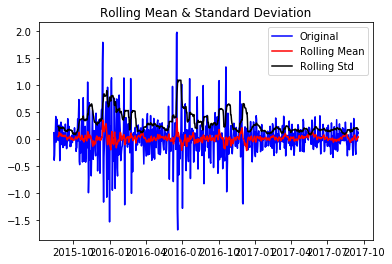

Results of Dickey-Fuller Test:
Test Statistic                -7.847074e+00
p-value                        5.731245e-12
#Lags Used                     2.000000e+01
Number of Observations Used    7.440000e+02
Critical Value (1%)           -3.439170e+00
Critical Value (5%)           -2.865433e+00
Critical Value (10%)          -2.568843e+00
dtype: float64


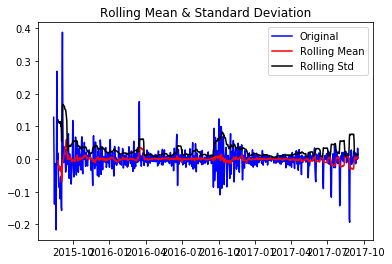

Results of Dickey-Fuller Test:
Test Statistic                -9.315291e+00
p-value                        1.023054e-15
#Lags Used                     1.500000e+01
Number of Observations Used    7.490000e+02
Critical Value (1%)           -3.439111e+00
Critical Value (5%)           -2.865407e+00
Critical Value (10%)          -2.568829e+00
dtype: float64


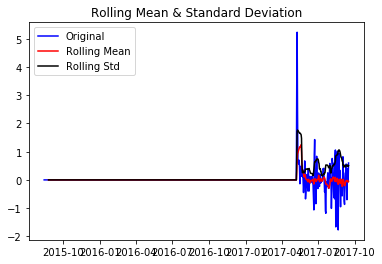

Results of Dickey-Fuller Test:
Test Statistic                  -5.356349
p-value                          0.000004
#Lags Used                      20.000000
Number of Observations Used    744.000000
Critical Value (1%)             -3.439170
Critical Value (5%)             -2.865433
Critical Value (10%)            -2.568843
dtype: float64


eth_etherprice      None
eth_tx              None
eth_address         None
eth_supply          None
eth_marketcap       None
eth_hashrate        None
eth_difficulty      None
eth_blocks          None
eth_blocksize       None
eth_blocktime       None
eth_gaslimit        None
eth_gasused         None
eth_ethersupply     None
eth_ens_register    None
dtype: object

In [87]:
eth_short_log_diff.dropna(inplace=True)
eth_short_log_diff.apply(test_stationarity, axis=0)

#### PCA and unsupervised learning: etherium

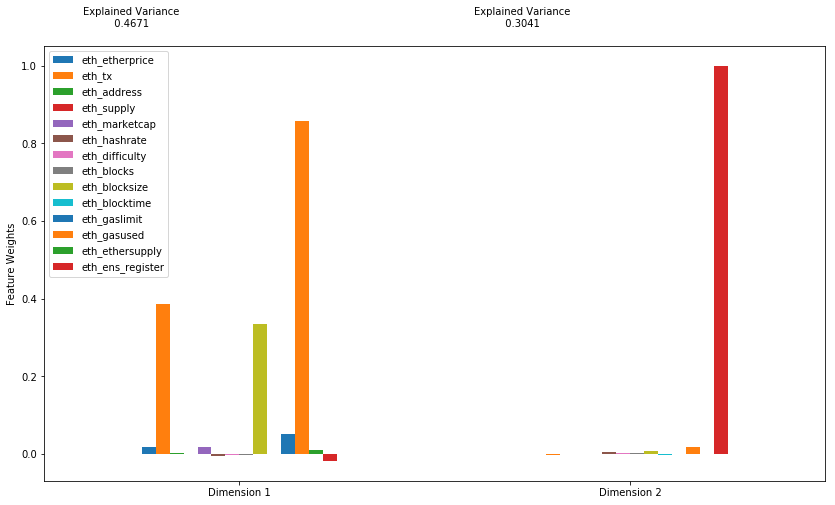

In [88]:
pca = PCA(n_components=2, random_state=0)
pca.fit(eth_short_log_diff)

# Generate PCA results plot
eth_pca_results = pca_results(eth_short_log_diff, pca)

In [89]:
print (eth_pca_results)

             Explained Variance  eth_etherprice  eth_tx  eth_address  \
Dimension 1              0.4671          0.0172  0.3874       0.0029   
Dimension 2              0.3041         -0.0008 -0.0033       0.0007   

             eth_supply  eth_marketcap  eth_hashrate  eth_difficulty  \
Dimension 1        -0.0         0.0172       -0.0047         -0.0033   
Dimension 2        -0.0        -0.0008        0.0045          0.0019   

             eth_blocks  eth_blocksize  eth_blocktime  eth_gaslimit  \
Dimension 1     -0.0031         0.3359         0.0006        0.0507   
Dimension 2      0.0018         0.0083        -0.0024        0.0010   

             eth_gasused  eth_ethersupply  eth_ens_register  
Dimension 1       0.8564           0.0119           -0.0177  
Dimension 2       0.0189           0.0014            0.9998  


In [90]:
eth_dataset_pca = pca.transform(eth_short_log_diff)

In [91]:
for possible_clusters_number in range(2,20):
    clusterer = mixture.GaussianMixture(n_components=possible_clusters_number, random_state=0).fit(eth_dataset_pca)
    preds = clusterer.predict(eth_dataset_pca)
    centers = clusterer.means_
    score = metrics.silhouette_score(eth_dataset_pca, preds)
    print ("For n_clusters =", possible_clusters_number,"the average silhouette_score is :", score)

For n_clusters = 2 the average silhouette_score is : 0.27446432357161454
For n_clusters = 3 the average silhouette_score is : 0.20670359767537214
For n_clusters = 4 the average silhouette_score is : 0.2756530051912683
For n_clusters = 5 the average silhouette_score is : 0.2560807070976596
For n_clusters = 6 the average silhouette_score is : 0.06962109642574892
For n_clusters = 7 the average silhouette_score is : -0.21102375254241
For n_clusters = 8 the average silhouette_score is : -0.21410051795015708
For n_clusters = 9 the average silhouette_score is : -0.2777406985211155
For n_clusters = 10 the average silhouette_score is : -0.2633153351190614
For n_clusters = 11 the average silhouette_score is : -0.042893113364686354
For n_clusters = 12 the average silhouette_score is : 0.04163488079907122
For n_clusters = 13 the average silhouette_score is : -0.024100810908890893
For n_clusters = 14 the average silhouette_score is : -0.05974549615467523
For n_clusters = 15 the average silhouette_s

In [92]:
for possible_clusters_number in range(2,20):
    clusterer = cluster.KMeans(n_clusters=possible_clusters_number, random_state=0).fit(eth_dataset_pca)
    preds = clusterer.predict(eth_dataset_pca)
    score = metrics.silhouette_score(eth_dataset_pca, preds)
    print ("For n_clusters =", possible_clusters_number,"the average silhouette_score is :", score)

For n_clusters = 2 the average silhouette_score is : 0.39559430226590164
For n_clusters = 3 the average silhouette_score is : 0.40818372367089945
For n_clusters = 4 the average silhouette_score is : 0.43726889806349906
For n_clusters = 5 the average silhouette_score is : 0.4307110573427936
For n_clusters = 6 the average silhouette_score is : 0.46137028426031806
For n_clusters = 7 the average silhouette_score is : 0.5001896309399784
For n_clusters = 8 the average silhouette_score is : 0.471829848815493
For n_clusters = 9 the average silhouette_score is : 0.47247922768251743
For n_clusters = 10 the average silhouette_score is : 0.47198185070730386
For n_clusters = 11 the average silhouette_score is : 0.474386870961369
For n_clusters = 12 the average silhouette_score is : 0.4616039887736657
For n_clusters = 13 the average silhouette_score is : 0.47104134254662156
For n_clusters = 14 the average silhouette_score is : 0.47739989383134934
For n_clusters = 15 the average silhouette_score is :

In [93]:
clusterer = mixture.GaussianMixture(n_components=2, random_state=0).fit(eth_dataset_pca)
preds = clusterer.predict(eth_dataset_pca)
centers = clusterer.means_
score = metrics.silhouette_score(eth_dataset_pca, preds)

In [94]:
eth_usl_data = pd.DataFrame(eth_dataset_pca, columns = ['Dimension 1', 'Dimension 2'])

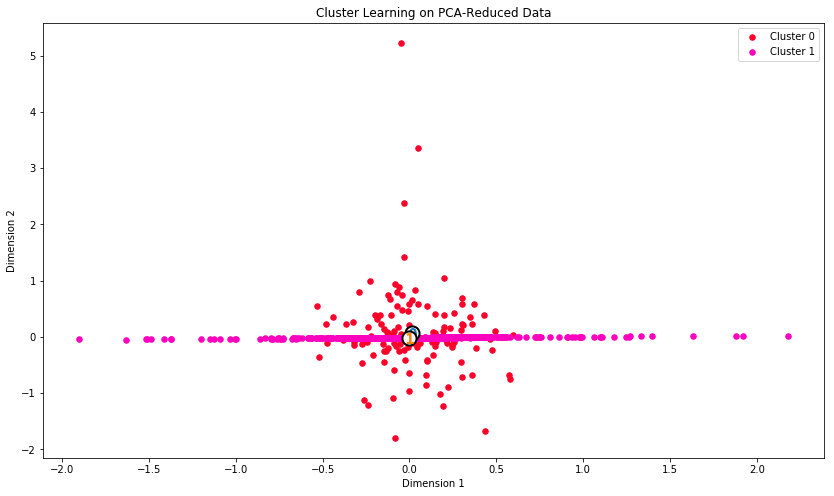

In [95]:
cluster_results(eth_usl_data, preds, centers)
plt.show()

#### Benchmark model: etherium

In [96]:
ye = (eth_short_log_diff['eth_etherprice']).values
Xe = (eth_short_log_diff.drop('eth_etherprice', axis = 1)).values

In [97]:
Xe_train = Xe[1::2] 
ye_train = ye[1::2]
Xe_test = Xe[2::2]
ye_test = ye[2::2]

In [98]:
regressor = linear_model.LinearRegression()

In [99]:
regressor.fit(Xe_train, ye_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [100]:
ye_hat_x = regressor.predict(Xe_test)

In [101]:
mae = mean_absolute_error(ye_test, ye_hat_x)
rmse = np.sqrt(mean_squared_error(ye_test, ye_hat_x))
print("Test MAE: %.6f" % mae,"\n",'Test RMSE: %.6f' % rmse)

Test MAE: 0.000000 
 Test RMSE: 0.000000


### LSTM for bitcoin

In [102]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
from sklearn import preprocessing
import random
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error

In [103]:
bitcoin_dataset_dl = pd.read_csv("/media/artemk/Data/Udacity/ML engineer/6/data/bitcoin_dataset.csv")
bitcoin_dataset_dl.drop(bitcoin_dataset_dl.index[:297], inplace =True)
bitcoin_dataset_dl.reset_index(drop=True, inplace=True)
bitcoin_dataset_dl.set_index('Date', inplace=True)
# we import dataset once again. The data preparation procedure is completly different from what was done in
#previous chapter.

In [105]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True): #adopted from [52]
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
#the function that tranforms the caclulats the differences between the current day values (t) and the values of the previous day 

In [106]:
values = bitcoin_dataset_dl.values

In [107]:
encoder = preprocessing.LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
#encoding normalizing labels

In [108]:
values = values.astype('float32')
#ensuaring that all values are float

In [109]:
np.nan_to_num(values,copy=False)
np.any(np.isnan(values))
#replacing all NaNs with numerical 0 and performing a check

False

In [110]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
#normalizing data

In [111]:
reframed = series_to_supervised(scaled, 1, 1)
#applying the series_to_supervised function

In [112]:
values_keys = list(reframed.columns.values)
values_values = list(range(0,(len(values_keys)),1))
values_dictionary = dict(zip(values_keys, values_values))
print(values_dictionary)
#creating an overview of newly made variables and their indexes

{'var1(t-1)': 0, 'var2(t-1)': 1, 'var3(t-1)': 2, 'var4(t-1)': 3, 'var5(t-1)': 4, 'var6(t-1)': 5, 'var7(t-1)': 6, 'var8(t-1)': 7, 'var9(t-1)': 8, 'var10(t-1)': 9, 'var11(t-1)': 10, 'var12(t-1)': 11, 'var13(t-1)': 12, 'var14(t-1)': 13, 'var15(t-1)': 14, 'var16(t-1)': 15, 'var17(t-1)': 16, 'var18(t-1)': 17, 'var19(t-1)': 18, 'var20(t-1)': 19, 'var21(t-1)': 20, 'var22(t-1)': 21, 'var23(t-1)': 22, 'var1(t)': 23, 'var2(t)': 24, 'var3(t)': 25, 'var4(t)': 26, 'var5(t)': 27, 'var6(t)': 28, 'var7(t)': 29, 'var8(t)': 30, 'var9(t)': 31, 'var10(t)': 32, 'var11(t)': 33, 'var12(t)': 34, 'var13(t)': 35, 'var14(t)': 36, 'var15(t)': 37, 'var16(t)': 38, 'var17(t)': 39, 'var18(t)': 40, 'var19(t)': 41, 'var20(t)': 42, 'var21(t)': 43, 'var22(t)': 44, 'var23(t)': 45}


In [113]:
reframed.drop(reframed.columns[[list(range(24, 45+1))]], axis=1, inplace=True)
#removing unrequired variables. In this case we want to predict only bitcoin price, thus we leave all t-1 variables for 
#training and variable t (the price), which are going to predict

/home/artemk/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:3968: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [72]:
#print(reframed)

In [129]:
btcdl_values = reframed.values

In [130]:
#q,w,e,r = np.split(values, 4)
#train = np.concatenate((q, e), axis=0)
#test = np.concatenate((w, r), axis=0)

In [131]:
btcdl_train=btcdl_values[1::2]
btcdl_test=btcdl_values[2::2]
#creating a test/train dataset. Although looking pretty innocent, this is a decision that heavily influences the
#robustness of the model. Please refer to the report. 

In [132]:
btcdl_train_X, btcdl_train_y = btcdl_train[:, :-1], btcdl_train[:, -1]
btcdl_test_X, btcdl_test_y = btcdl_test[:, :-1], btcdl_test[:, -1]
btcdl_train_X = btcdl_train_X.reshape((btcdl_train_X.shape[0], 1, btcdl_train_X.shape[1]))
btcdl_test_X = btcdl_test_X.reshape((btcdl_test_X.shape[0], 1, btcdl_test_X.shape[1]))
print(btcdl_train_X.shape, btcdl_train_y.shape, btcdl_test_X.shape, btcdl_test_y.shape)
#reshaping the train and test to fit the 3D input of LSTM

(646, 1, 23) (646,) (645, 1, 23) (645,)


In [133]:
stopper = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
#creating a callback function, because we do not have all day

Train on 646 samples, validate on 645 samples
Epoch 1/200
 - 2s - loss: 0.0731 - val_loss: 0.0570
Epoch 2/200
 - 0s - loss: 0.0564 - val_loss: 0.0581
Epoch 3/200
 - 0s - loss: 0.0413 - val_loss: 0.0539
Epoch 4/200
 - 0s - loss: 0.0442 - val_loss: 0.0420
Epoch 5/200
 - 0s - loss: 0.0436 - val_loss: 0.0342
Epoch 6/200
 - 0s - loss: 0.0370 - val_loss: 0.0294
Epoch 7/200
 - 0s - loss: 0.0311 - val_loss: 0.0278
Epoch 8/200
 - 0s - loss: 0.0251 - val_loss: 0.0316
Epoch 9/200
 - 0s - loss: 0.0198 - val_loss: 0.0243
Epoch 10/200
 - 0s - loss: 0.0165 - val_loss: 0.0189
Epoch 11/200
 - 0s - loss: 0.0147 - val_loss: 0.0271
Epoch 12/200
 - 0s - loss: 0.0160 - val_loss: 0.0151
Epoch 13/200
 - 0s - loss: 0.0165 - val_loss: 0.0251
Epoch 14/200
 - 0s - loss: 0.0148 - val_loss: 0.0187
Epoch 15/200
 - 0s - loss: 0.0160 - val_loss: 0.0257
Epoch 16/200
 - 0s - loss: 0.0134 - val_loss: 0.0171
Epoch 17/200
 - 0s - loss: 0.0145 - val_loss: 0.0249


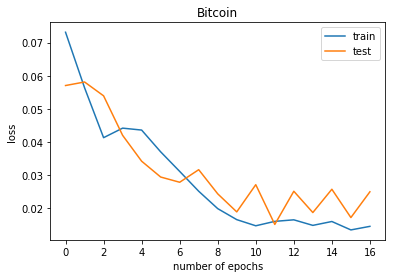

In [134]:
# designing the LSTM
model = Sequential()
model.add(LSTM(100, input_shape=(btcdl_train_X.shape[1], btcdl_train_X.shape[2]),return_sequences=True))
model.add(LSTM(75,return_sequences=True))
model.add(LSTM(20,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adagrad')
# training the model
LSTM_training = model.fit(btcdl_train_X, btcdl_train_y, epochs=200, batch_size=72, validation_data=(btcdl_test_X, btcdl_test_y), verbose=2, shuffle=False, callbacks=[stopper] )
# plot history
pyplot.plot(LSTM_training.history['loss'], label='train')
pyplot.plot(LSTM_training.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.title("Bitcoin")
pyplot.legend()
pyplot.show()

In [135]:
#make a prediction
yhat = model.predict(btcdl_test_X)
btcdl_test_X = btcdl_test_X.reshape((btcdl_test_X.shape[0], btcdl_test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, btcdl_test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
btcdl_test_y = btcdl_test_y.reshape((len(btcdl_test_y), 1))
inv_y = concatenate((btcdl_test_y, btcdl_test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate metrics
mae = mean_absolute_error(inv_y, inv_yhat)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print("Test MAE: %.3f" % mae,"\n",'Test RMSE: %.3f' % rmse)

Test MAE: 118.396 
 Test RMSE: 193.089


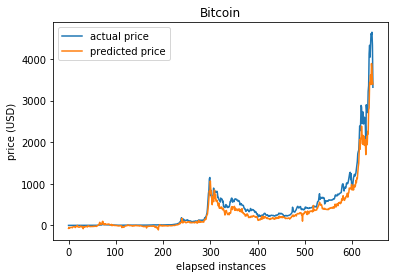

In [136]:
plt.plot(inv_y, label='actual price')
plt.plot(inv_yhat, label='predicted price')
plt.ylabel('price (USD)')
plt.xlabel('elapsed instances')
plt.title("Bitcoin")
plt.legend()
plt.show()

In [137]:
inv_y_btc_dl = np.diff(np.diff(np.log(inv_y)))
inv_yhat_btc_dl = np.diff(np.diff(np.nan_to_num(np.log(inv_yhat))))
#re-scaling the LSTM outputs to comapre to the becnhmark model

/home/artemk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [138]:
mae = mean_absolute_error(inv_y_btc_dl, inv_yhat_btc_dl)
rmse = sqrt(mean_squared_error(inv_y_btc_dl, inv_yhat_btc_dl))
print("Test MAE: %.3f" % mae,"\n",'Test RMSE: %.3f' % rmse)

Test MAE: 0.283 
 Test RMSE: 0.632


### LSTM for Etherium

In [139]:
eth_dataset_dl = pd.read_csv("/media/artemk/Data/Udacity/ML engineer/6/data/ethereum_dataset.csv", parse_dates=[0], index_col='Date')
eth_dataset_dl.replace(r'\s+', 0, regex=True)
eth_dataset_dl.drop(['UnixTimeStamp'], axis= 1, inplace=True)
eth_dataset_dl.drop(eth_dataset_dl.index[:13], inplace =True)

In [140]:
eth_values = eth_dataset_dl.values

In [141]:
encoder = preprocessing.LabelEncoder()
eth_values[:,4] = encoder.fit_transform(eth_values[:,4])
#encoding normalizing labels

In [142]:
eth_values = eth_values.astype('float32')
#ensuaring that all values are float

In [143]:
np.nan_to_num(eth_values,copy=False)
np.any(np.isnan(eth_values))
#replacing all NaNs with numerical 0 and performing a check

False

In [144]:
eth_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
eth_scaled = eth_scaler.fit_transform(eth_values)
#normalizing data

In [145]:
eth_reframed = series_to_supervised(eth_scaled, 1, 1)
#applying the series_to_supervised function

In [146]:
eth_values_keys = list(eth_reframed.columns.values)
eth_values_values = list(range(0,(len(eth_values_keys)),1))
eth_values_dictionary = dict(zip(eth_values_keys, eth_values_values))
print(eth_values_dictionary)
#creating an overview of newly made variables and their indexes

{'var1(t-1)': 0, 'var2(t-1)': 1, 'var3(t-1)': 2, 'var4(t-1)': 3, 'var5(t-1)': 4, 'var6(t-1)': 5, 'var7(t-1)': 6, 'var8(t-1)': 7, 'var9(t-1)': 8, 'var10(t-1)': 9, 'var11(t-1)': 10, 'var12(t-1)': 11, 'var13(t-1)': 12, 'var14(t-1)': 13, 'var15(t-1)': 14, 'var16(t-1)': 15, 'var1(t)': 16, 'var2(t)': 17, 'var3(t)': 18, 'var4(t)': 19, 'var5(t)': 20, 'var6(t)': 21, 'var7(t)': 22, 'var8(t)': 23, 'var9(t)': 24, 'var10(t)': 25, 'var11(t)': 26, 'var12(t)': 27, 'var13(t)': 28, 'var14(t)': 29, 'var15(t)': 30, 'var16(t)': 31}


In [147]:
eth_reframed.drop(eth_reframed.columns[[list(range(17, 31+1))]], axis=1, inplace=True)
#removing unrequired variables. In this case we want to predict only bitcoin price, thus we leave all t-1 variables for 
#training and variable t (the price), which are going to predict

/home/artemk/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:3968: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [148]:
ethdl_values = eth_reframed.values

In [149]:
#q,w,e,r = np.split(values, 4)
#train = np.concatenate((q, e), axis=0)
#test = np.concatenate((w, r), axis=0)

In [150]:
ethdl_train=ethdl_values[1::2]
ethdl_test=ethdl_values[2::2]

In [151]:
ethdl_train_X, ethdl_train_y = ethdl_train[:, :-1], ethdl_train[:, -1]
ethdl_test_X, ethdl_test_y = ethdl_test[:, :-1], ethdl_test[:, -1]
ethdl_train_X = ethdl_train_X.reshape((ethdl_train_X.shape[0], 1, ethdl_train_X.shape[1]))
ethdl_test_X = ethdl_test_X.reshape((ethdl_test_X.shape[0], 1, ethdl_test_X.shape[1]))
print(ethdl_train_X.shape, ethdl_train_y.shape, ethdl_test_X.shape, ethdl_test_y.shape)
#reshaping the train and test to fit the 3D input of LSTM

(383, 1, 16) (383,) (382, 1, 16) (382,)


In [152]:
stopper = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

Train on 383 samples, validate on 382 samples
Epoch 1/100
 - 2s - loss: 0.1255 - val_loss: 0.1265
Epoch 2/100
 - 0s - loss: 0.1250 - val_loss: 0.1168
Epoch 3/100
 - 0s - loss: 0.1142 - val_loss: 0.0939
Epoch 4/100
 - 0s - loss: 0.0870 - val_loss: 0.0627
Epoch 5/100
 - 0s - loss: 0.0436 - val_loss: 0.0658
Epoch 6/100
 - 0s - loss: 0.0580 - val_loss: 0.0394
Epoch 7/100
 - 0s - loss: 0.0347 - val_loss: 0.0450
Epoch 8/100
 - 0s - loss: 0.0448 - val_loss: 0.0373
Epoch 9/100
 - 0s - loss: 0.0325 - val_loss: 0.0513
Epoch 10/100
 - 0s - loss: 0.0443 - val_loss: 0.0313
Epoch 11/100
 - 0s - loss: 0.0320 - val_loss: 0.0367
Epoch 12/100
 - 0s - loss: 0.0359 - val_loss: 0.0285
Epoch 13/100
 - 0s - loss: 0.0306 - val_loss: 0.0333
Epoch 14/100
 - 0s - loss: 0.0335 - val_loss: 0.0278
Epoch 15/100
 - 0s - loss: 0.0295 - val_loss: 0.0312
Epoch 16/100
 - 0s - loss: 0.0314 - val_loss: 0.0275
Epoch 17/100
 - 0s - loss: 0.0290 - val_loss: 0.0279


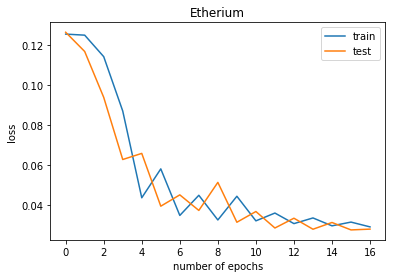

In [153]:
# designing the LSTM
model = Sequential()
model.add(LSTM(100, input_shape=(ethdl_train_X.shape[1], ethdl_train_X.shape[2]),return_sequences=True))
model.add(LSTM(75,return_sequences=True))
model.add(LSTM(20,return_sequences=False))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adagrad')
# training the model
LSTM_training = model.fit(ethdl_train_X, ethdl_train_y, epochs=100, batch_size=72, validation_data=(ethdl_test_X, ethdl_test_y), verbose=2, shuffle=False, callbacks=[stopper] )
# plot history
pyplot.plot(LSTM_training.history['loss'], label='train')
pyplot.plot(LSTM_training.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.title("Etherium")
pyplot.legend()
pyplot.show()

In [154]:
yhat = model.predict(ethdl_test_X)
ethdl_test_X = ethdl_test_X.reshape((ethdl_test_X.shape[0], ethdl_test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, ethdl_test_X[:, 1:]), axis=1)
inv_yhat = eth_scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
ethdl_test_y = ethdl_test_y.reshape((len(ethdl_test_y), 1))
inv_y = concatenate((ethdl_test_y, ethdl_test_X[:, 1:]), axis=1)
inv_y = eth_scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mae = mean_absolute_error(inv_y, inv_yhat)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print("Test MAE: %.3f" % mae,"\n",'Test RMSE: %.3f' % rmse)

Test MAE: 10.993 
 Test RMSE: 22.657


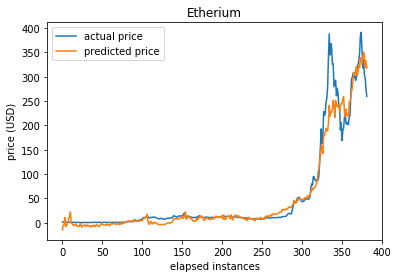

In [155]:
plt.plot(inv_y, label='actual price')
plt.plot(inv_yhat, label='predicted price')
plt.title("Etherium")
plt.ylabel('price (USD)')
plt.xlabel('elapsed instances')
plt.legend()
plt.show()

In [156]:
inv_y_eth_dl = np.diff(np.diff(np.nan_to_num(np.log(inv_y))))
inv_yhat_eth_dl = np.diff(np.diff(np.nan_to_num(np.log(inv_yhat))))
#re-scaling the LSTM outputs to comapre to the becnhmark model

/home/artemk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [157]:
mae = mean_absolute_error(inv_y_eth_dl, inv_yhat_eth_dl)
rmse = sqrt(mean_squared_error(inv_y_eth_dl, inv_yhat_eth_dl))
print("Test MAE: %.3f" % mae,"\n",'Test RMSE: %.3f' % rmse)

Test MAE: 0.346 
 Test RMSE: 0.681
